## P5-predict Sepsis

### Business Understanding

##### `Project Overview`
The primary objective of the "P5 Sepsis Prediction" project is to develop a robust machine learning model that predicts the likelihood of sepsis in ICU patients. Sepsis is a life-threatening condition caused by the body's response to infection, and early detection is critical for patient survival. By embedding the predictive model in an API, we aim to provide healthcare providers with a powerful tool for real-time sepsis prediction, enhancing decision-making and patient outcomes.


##### `Project Goal`
Build a classification Model to predict the likelihhood of sepsis in ICU patients.


##### `Business Objectives`
- Early Detection of Sepsis: Improve patient outcomes by predicting sepsis early, enabling timely intervention and treatment.
- Enhanced Clinical Decision Support: Provide healthcare professionals with actionable insights through an easily integrable API, supporting clinical decisions in real-time.
- Optimized Resource Allocation: Help healthcare facilities optimize the allocation of resources by identifying high-risk patients who may require intensive monitoring and care.


##### `Source of Data`
The dataset provided for this project is a modified version of a publicly available data source from Johns Hopkins University from Kaggle. It includes various patient attributes and their corresponding sepsis status. The dataset is subject to strict usage restrictions and can only be used for the purpose of this assignment.


##### `Key Stakeholders`
- Healthcare Providers: Doctors, nurses, and other medical staff who will use the sepsis prediction API to make informed clinical decisions.
- Hospital Administrators: Individuals responsible for resource management and policy implementation in healthcare facilities.
- Data Scientists and Developers: Team members involved in the development, training, and deployment of the machine learning model and API.


##### `Success Criteria`
- Accuracy: The model's should obtain an accuracy of 75% or higher.
- Precision and Recall:The final model should maintain both Precision and Recall scores of 0.75 or above.
- F1 Score: The final model should attain an F1 score of 0.75 to 0.85 or higher according to state-of-the-art SOTA models
Area Under the Receiver Operating Characteristic Curve (AUC-ROC): According to the state-of-the-art SOTA models for sepsis prediction should achieve AUC-ROC scores in the range of 0.80 to 0.90 or higher.


##### `Data Dictionary`

| Column Name       | Attribute/Target | Data Type | Description                                                                                 |
|-------------------|------------------|------------|---------------------------------------------------------------------------------------------|
| **ID**            | N/A              | Integer    | Unique identifier for each patient.                                                         |
| **PRG**           | Attribute        | Float      | Plasma glucose: Measurement of plasma glucose levels.                                       |
| **PL**            | Attribute        | Float      | Blood Work Result-1: Blood work result in mu U/ml.                                          |
| **PR**            | Attribute        | Float      | Blood Pressure: Measurement of blood pressure in mm Hg.                                     |
| **SK**            | Attribute        | Float      | Blood Work Result-2: Blood work result in mm.                                               |
| **TS**            | Attribute        | Float      | Blood Work Result-3: Blood work result in mu U/ml.                                          |
| **M11**           | Attribute        | Float      | Body Mass Index: BMI calculated as weight in kg/(height in m)^2.                            |
| **BD2**           | Attribute        | Float      | Blood Work Result-4: Blood work result in mu U/ml.                                          |
| **Age**           | Attribute        | Integer    | Age: Age of the patient in years.                                                           |
| **Insurance**     | N/A              | Boolean    | Insurance: Indicates whether the patient holds a valid insurance card.                      |
| **Sepssis**        | Target           | Boolean    | Sepsis: Target variable indicating whether the patient will develop sepsis (Positive) or not (Negative). |


##### `Hypothesis Statement`
Sepsis, a life-threatening condition, is a leading cause of mortality in intensive care units. While lack of insurance and age differences has been associated with higher in-hospital mortality due to sepsis, the reasons behind this disparity remain unclear. Insurance can facilitate timely access to care, potentially impacting sepsis outcomes and age is a factor that is likely to determine sepsis-related hospitalization.

With this, I investigate this hypothesis
`Null Hypothesis (Ho)`: There is no correlation between age and individual's likelihood of developing sepssis.
`Altenatenate Hypothesis (Ha)`: There is a statistically significant correlation between age and individual's likelihood of developing sepssis.


##### `Analytical Questions`
1. Are elderly people at a higher risk of developing sepssis compared to younger individuals?
2. Are patients with a high BMI at a greater risk of developing sepssis?
3. Are patients with high blood pressure at a greater risk of developing sepssis?
4. Does higher plasma glucose increase the likelihood of developing sepssis?
5. Are patients with higher insurance coverage at a greater risk of developing sepssis?

 


### Data Understanding

#### Importations

In [29]:
# System Libraries
import os
import sys

# Add the src directory to the notebook path
src_path = os.path.abspath(os.path.join('..', 'api'))
sys.path.append(src_path)


# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.decomposition import PCA
from optuna import visualization as ov
import plotly.express as px

# Statistics libraries
from scipy.stats import spearmanr


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,FunctionTransformer,StandardScaler,OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV
from feature_transformer import FeatureEngineeringTransformer
import optuna


# Metrics libraries
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics import f1_score as optuna_f1_score


# Utility libraries
import warnings
import joblib
warnings.filterwarnings("ignore")

# Define custom color palette
custom_palette = {"Positive":"Red","Negative":"Green"}

#### Data Loading

In [2]:
# load the csv data
df = pd.read_csv("../data/Paitients_Files_Train.csv")

#### Exploratory Data Analysis

In [3]:
# load first five rows of data
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# load last row of data
df.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [5]:
# Rename columns in Dataset for clarity sake
new_col_names = {
    "PRG":"Plasma_Glucose",
    "PL":"Blood_Work_Result_1",
    "PR":"Blood_Pressure",
    "SK":"Blood_Work_Result_2",
    "TS":"Blood_Work_Result_3",
    "M11":"Body_Mass_Index",
    "BD2":"Blood_Work_Result_4",
    "Sepssis":"Sepsis"
}

df.rename(columns = new_col_names,inplace=True)

In [6]:
# confirm changes
df.head()

,ID,Plasma_Glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_Mass_Index,Blood_Work_Result_4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [7]:
# Drop the ID column
df.drop("ID",axis=1, inplace=True)

In [8]:
# check the shape of the dataframe
df.shape

(599, 10)

In [9]:
# perform descriptive statistics on data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_Glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_Result_1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_Result_2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_Result_3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body_Mass_Index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_Result_4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


##### Key Observations
- The average plasma glucose level of the patients is 3.825 mg/dL, with min = 0.00 mg/dL and max = 17.0 mg/dL
- The average plasma glucose level of 3.825 and median of 3.0 might suggest a bell-shape distribution with some skewness in the data.
- The blood work results will be researched further.
- The average blood pressure of a patient is 68.73 mm Hg, median of 70.00 mm Hg and the min and max blood pressures measure are 0.00 mm Hg and 122.00 mm Hg
- 25% of the patients have blood pressure levels below 99.00 mm Hg and 75% has their blood pressures below 140.00 mm Hg suggessting low blood among the patients.
- The average BMI of a patient is 31.92, a standard deviation of 8.00, a mean of 32, min BMI of 0 and a max BMI of 67.10.
- From the observation that 25% of ICU patients have a BMI below 27.10 and 75% have a BMI below 36.55, we can conclude that a large portion of the ICU population falls into the overweight and obese categories. This highlights the need for specialized care and interventions to manage sepsis risks and complications in these patients.
- The min age distribution of the patient population is 21 years and the max age is 81 years.
- The average of the patients is around 33years and a median age of 29 years.

In [10]:
# check the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma_Glucose       599 non-null    int64  
 1   Blood_Work_Result_1  599 non-null    int64  
 2   Blood_Pressure       599 non-null    int64  
 3   Blood_Work_Result_2  599 non-null    int64  
 4   Blood_Work_Result_3  599 non-null    int64  
 5   Body_Mass_Index      599 non-null    float64
 6   Blood_Work_Result_4  599 non-null    float64
 7   Age                  599 non-null    int64  
 8   Insurance            599 non-null    int64  
 9   Sepsis               599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [11]:
# Check for nulls
df.isna().sum().sum()

np.int64(0)

In [12]:
# check for duplicates 
df.duplicated().sum()

np.int64(0)

#### Univariate Analysis

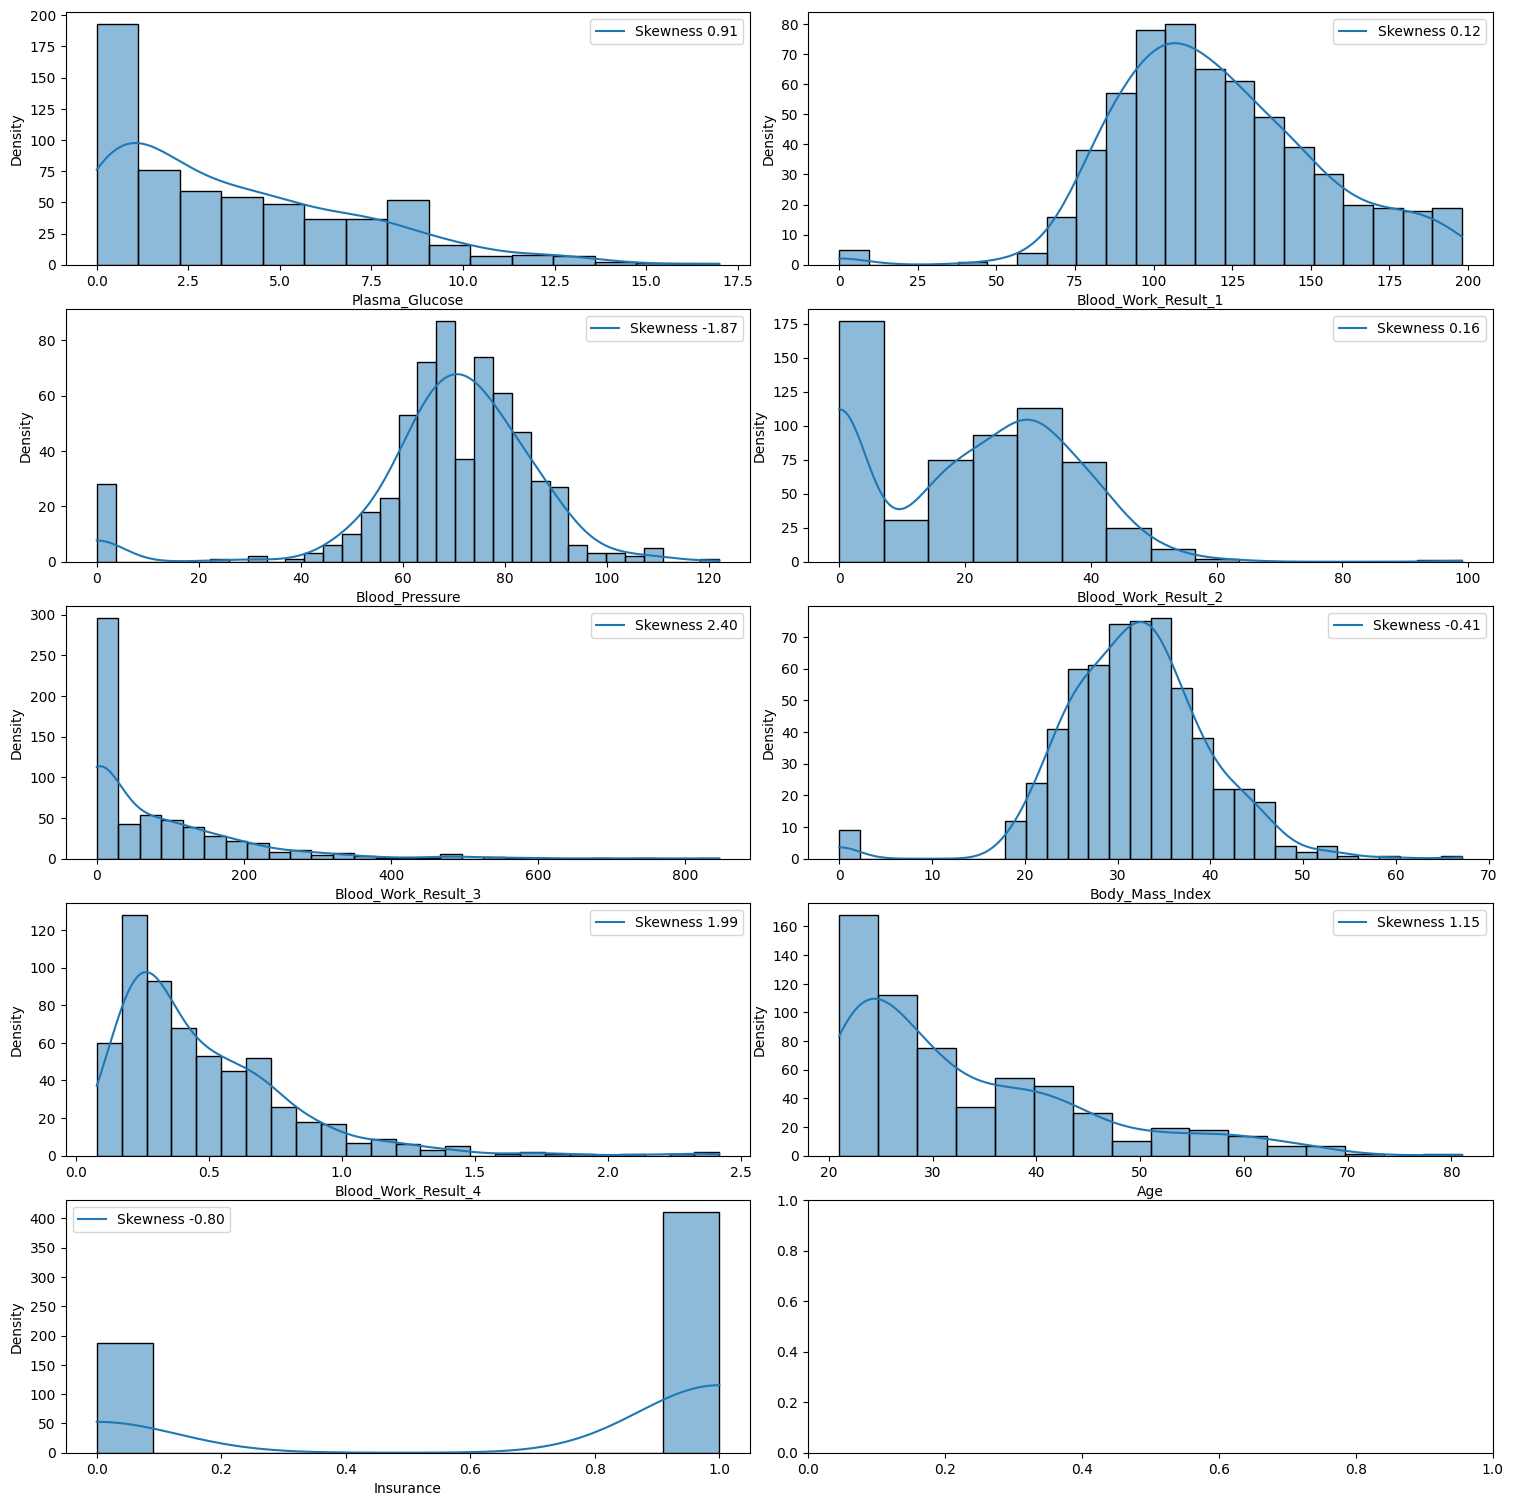

In [13]:
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.histplot(df[column], ax=axes[id], kde=True)
        skewness = df[column].skew()
        axes[id].legend([f"Skewness {skewness:.2f}"])
        # axes[id].set_title(f"Histogram of {column}")
        axes[id].set_ylabel("Density")
plt.show()

The distribution of the Sepsis feature shows that the entire dataset is not normaly distributed. 

#### Positively Skewed Features
- *Age* : The above visualization, shows the age distribution for the 599 ICU patients with the age range between 20 and 81. The histogram plot shows a rightly-skewed data(skewness = 1.15), indicating that majority of the patients are concentrated towards the younger age as denoted by the peak around the 20s and 30s. The mean age of around 33.29 aligns with this observation and with a standard deviation of 11.82 shows the spread of the data around this figure. Overall, the visualization depicts the younger age distribution of patients within our dataset.

- *Plasma Glucose* : The distribution of the plasma glucose levels of the patients is skewed towards the right(skewness=0.91) with a range between 0.0 and 17.5. This indicates that majority of the patients has the plasma glucose levels below the normal blood sugar level which is between 4.0 - 5.4 mmol/L.Also with an average plasma glucose level of 3.82 mmol/L and 75 percent of patients having a plasma glucose levels below 6.0. With max plasma glucose of 17.5 indicates the presence of outliers.

- *Blood Work Results* : The blood work results 3 and  distribution of the BMI levels of the patients is also skewed towards the right(skewness=1.56) with a range between 0.0 and 67.1. This indicates that majority of the patients has the BMI levels below the normal range which is between 18.5 - 25.0. Also with an average BMI level of 31.92 mmol/L and


#### Box Plot Visualizations To Check for Outliers

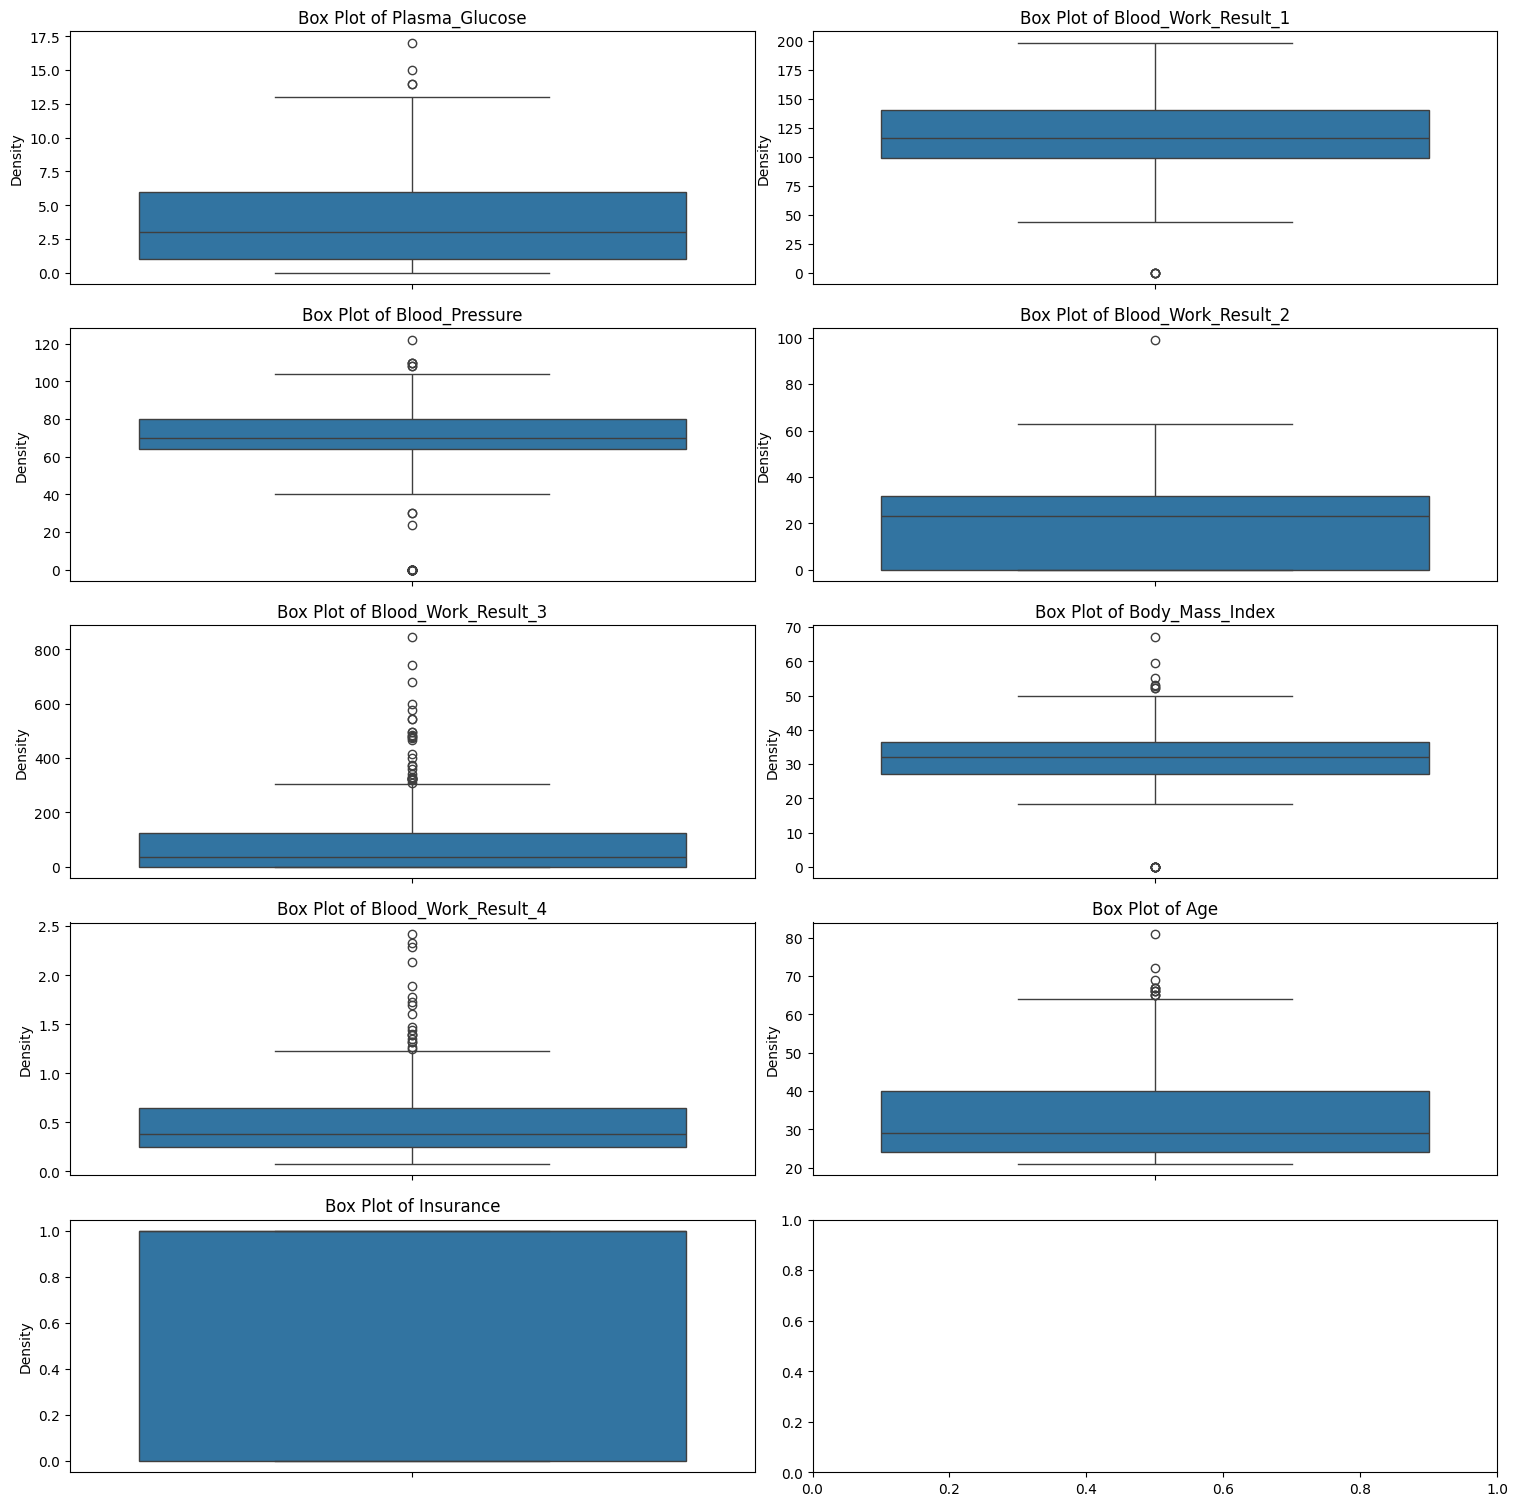

In [14]:
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.boxplot(df[column], ax=axes[id])
        axes[id].set_title(f"Box Plot of {column}")
        axes[id].set_ylabel("Density")
plt.show()

The box plot visualizations depicts the presence of outliers in the data.
- The outliers will be looked at and dealt with appropriately based on stakeholders advice and the project objectives.
- The numerical columns will be scaled using various scaling methods to ensure that the data is kept in the same range.
- Log transformations will be applied too in the data preparation stage.

#### Bivariate Analysis

In [15]:
df.columns

Index(['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_Mass_Index',
       'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepsis'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

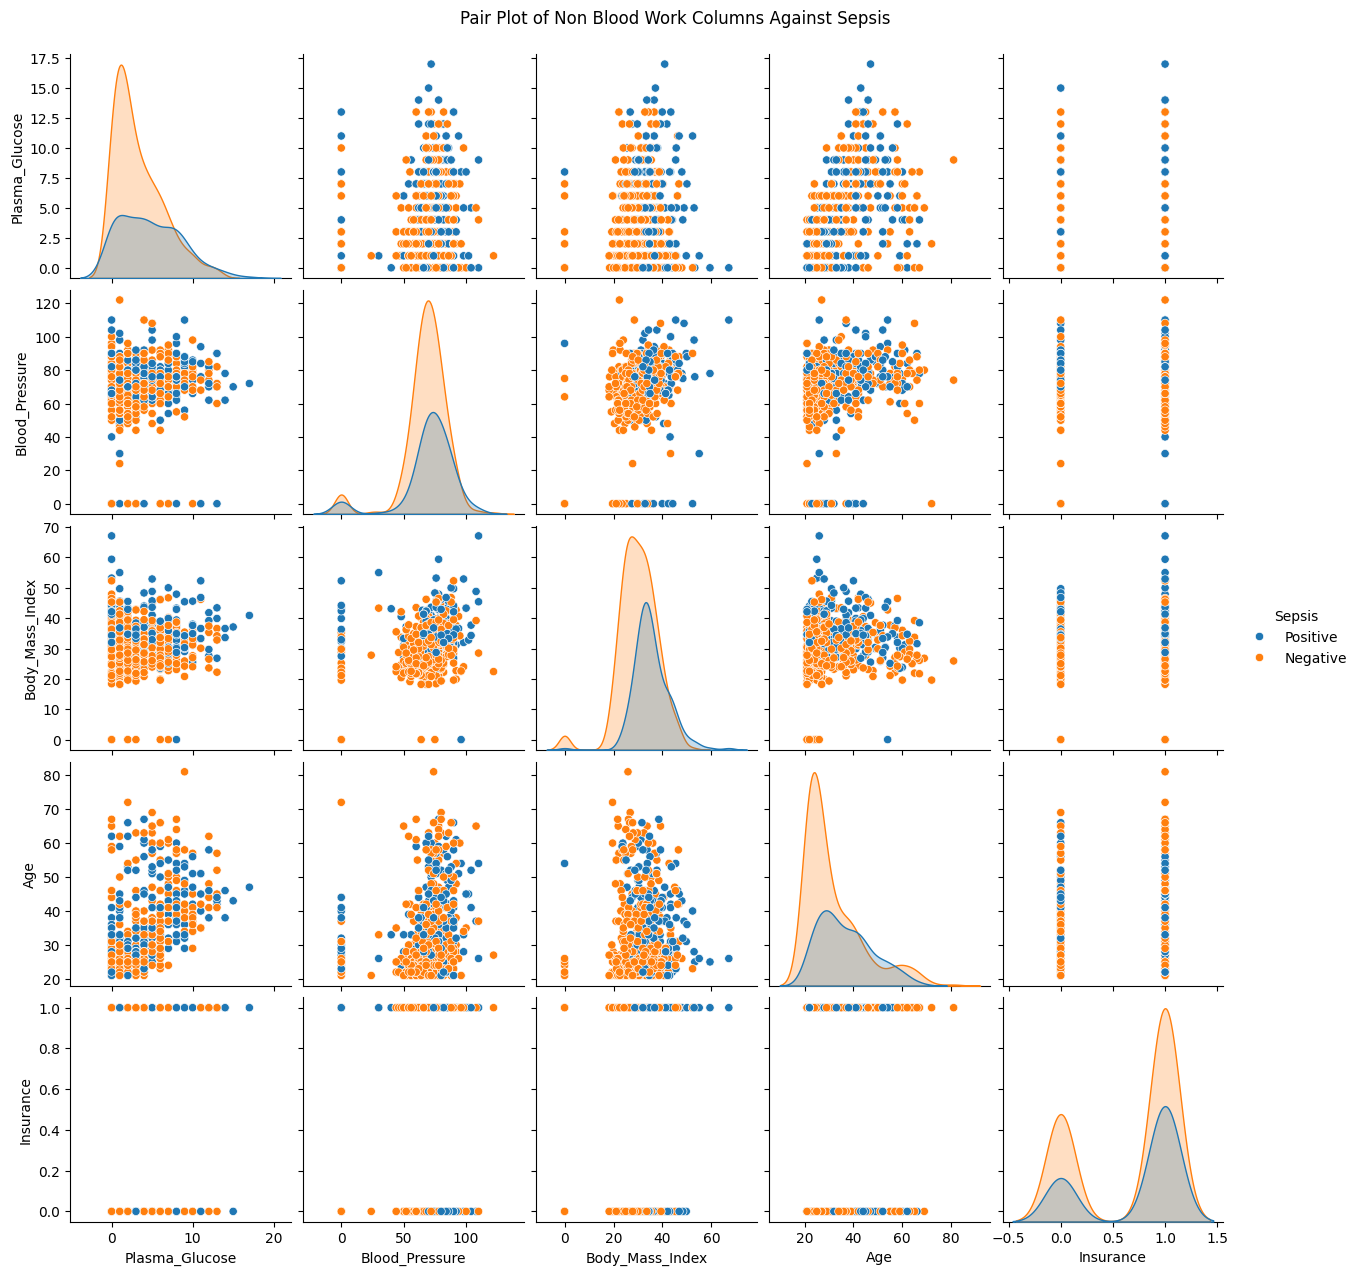

In [16]:
#  Plot pair plot for non blood work result types columns
non_blood_work = ["Plasma_Glucose","Blood_Pressure","Body_Mass_Index","Age","Insurance","Sepsis"]
plt.figure(figsize=(15,15))
sns.pairplot(df[non_blood_work], diag_kind="kde",hue="Sepsis")
plt.suptitle('Pair Plot of Non Blood Work Columns Against Sepsis', y=1.02)
plt.show()

<Figure size 1500x1500 with 0 Axes>

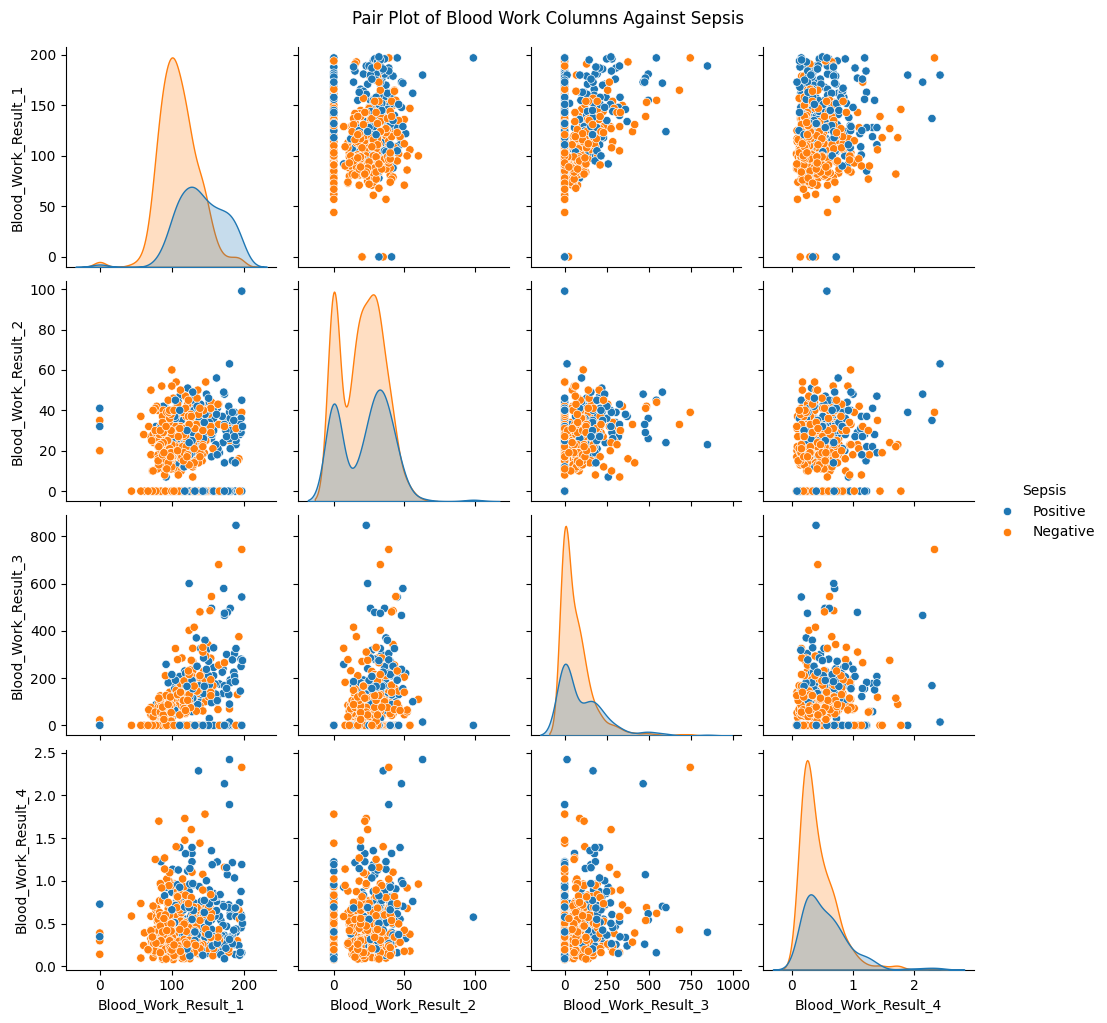

In [17]:
#  Plot pair plot for blood work result types columns against Sepssis columns
blood_work_columns = ["Blood_Work_Result_1","Blood_Work_Result_2","Blood_Work_Result_3","Blood_Work_Result_4","Sepsis"]
plt.figure(figsize=(15,15))
sns.pairplot(df[blood_work_columns], diag_kind="kde",hue="Sepsis")
plt.suptitle('Pair Plot of Blood Work Columns Against Sepsis', y=1.02)
plt.show()

#### Checking Correlation With Phik Correlation Matrix

interval columns not set, guessing: ['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure', 'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_Mass_Index', 'Blood_Work_Result_4', 'Age', 'Insurance']


<Figure size 1500x1500 with 0 Axes>

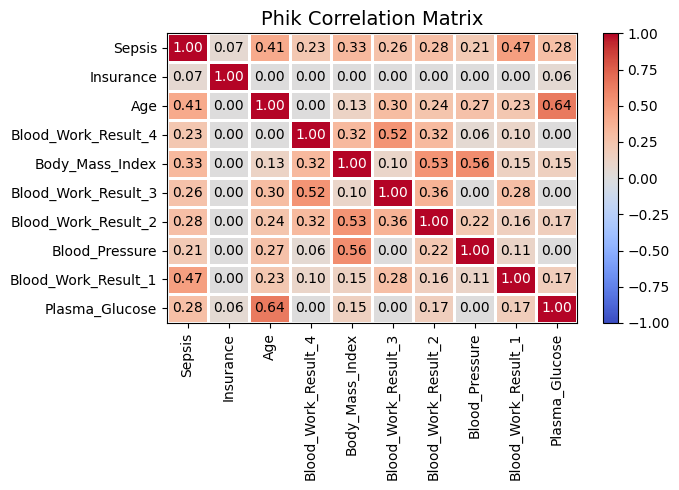

In [18]:
# plot the phik correlation matrix
plt.figure(figsize=(15,15))
corr_matrix = df.phik_matrix()
plot_correlation_matrix(corr_matrix.values,x_labels=corr_matrix.columns,color_map="coolwarm",y_labels=corr_matrix.index,title="Phik Correlation Matrix")
plt.tight_layout()
plt.show()

#### Multivariate Analysis


##### Principal Component Analysis

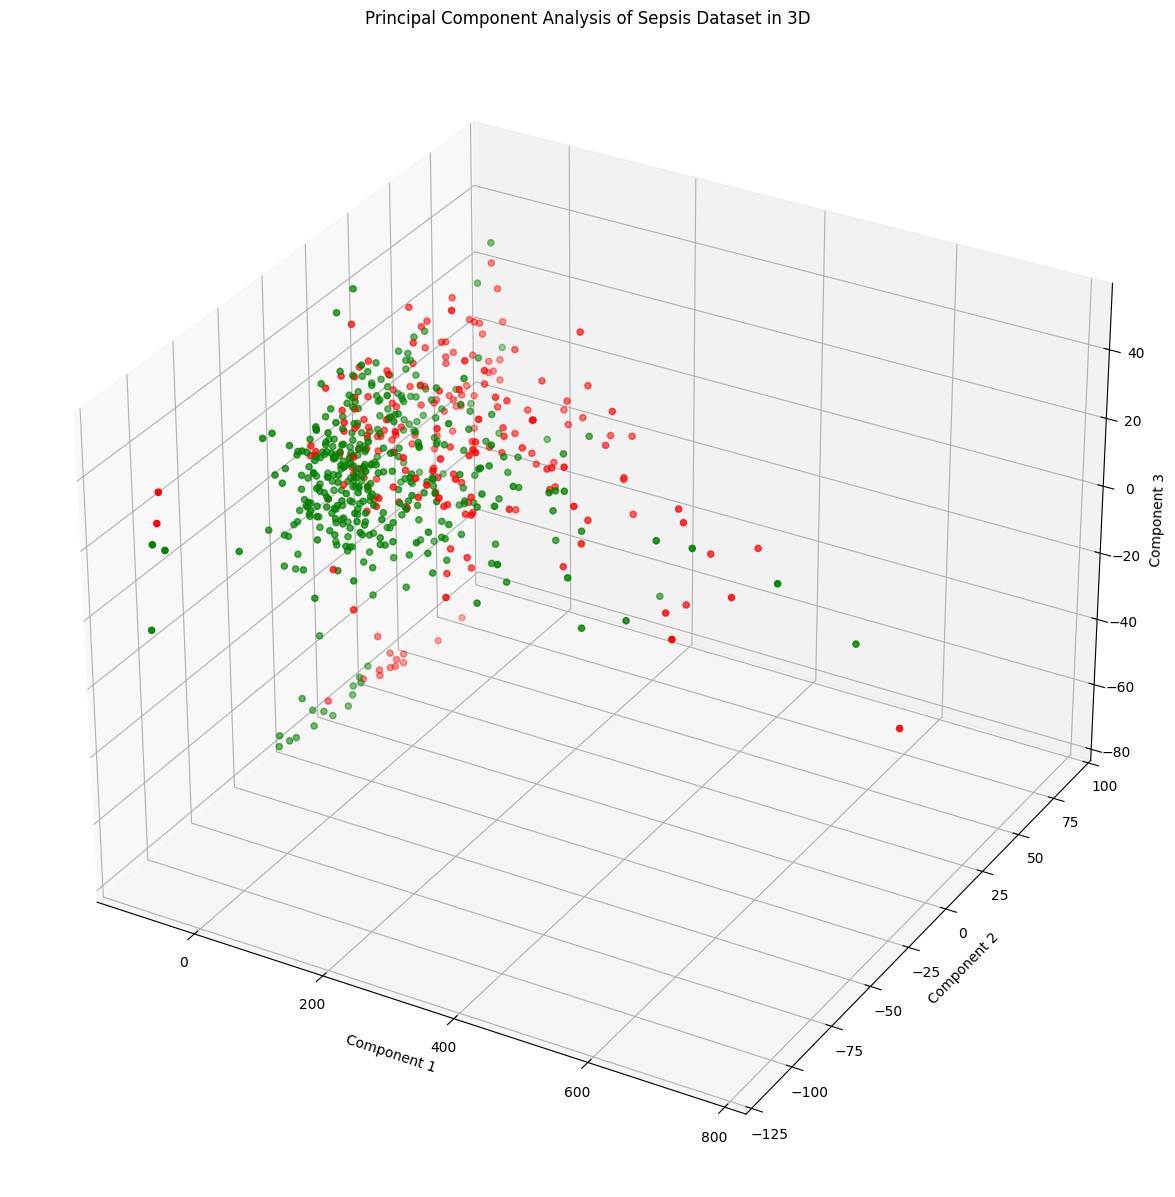

In [19]:
#Perform PCA with three dimensions
X_components = df.drop(columns="Sepsis")
y_compnents = df["Sepsis"].map(custom_palette)
pca = PCA(n_components=3)
pca_sepsis = pca.fit_transform(X_components)

# Add figure and subplots
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = "3d")

# Scatter plot of components and coloring by Sepssis
ax.scatter(pca_sepsis[:,0],pca_sepsis[:,1],pca_sepsis[:,2], c=y_compnents)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("Principal Component Analysis of Sepsis Dataset in 3D")
plt.show()

#### Answering The Analytical Questions

##### Question 1
Are elderly people at a higher risk of developing sepssis compared to younger individuals?

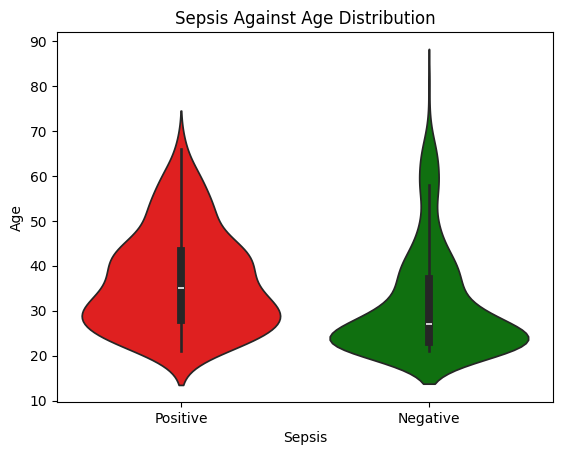

In [20]:
# Violin Plot
sns.violinplot(df,x="Sepsis",y="Age",palette=custom_palette)
plt.title("Sepsis Against Age Distribution")
plt.show()

#### **Analysis of Age Distribution and Sepsis Risk**

Our analysis of the age distribution among patients with sepsis compared to those without reveals some interesting insights:

- The average age of all patients in the dataset is approximately 33.29 years.
- For patients diagnosed with sepsis, the median age is around 34 years.
- In contrast, patients without sepsis have a median age of about 25 years.

From these observations, we can infer that older patients are more likely to develop sepsis compared to younger patients. The higher median age for those with sepsis suggests that as age increases, so does the risk of contracting sepsis. This insight highlights the importance of considering age as a significant factor in the risk assessment for sepsis.

##### Question 2
Are patients with a high BMI at a greater risk of developing sepssis?


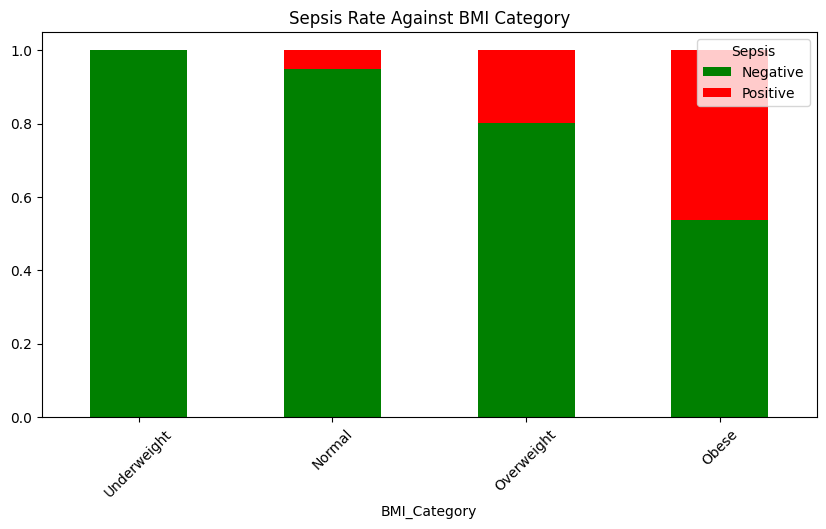

In [21]:
# Categorize BMI
df["BMI_Category"] = pd.cut(df["Body_Mass_Index"],bins=[0,18.5,24.9,29.5,float("inf")],
                            labels=["Underweight","Normal","Overweight","Obese"])

sepssis_counts = df.groupby("BMI_Category")["Sepsis"].value_counts(normalize=True).unstack()

# Plot Sepsis Rate for each BMI category
sepssis_counts.plot(kind="bar", stacked=True, figsize=(10,5), color=custom_palette)
plt.title("Sepsis Rate Against BMI Category")
plt.xticks(rotation = 45)
plt.show() 

#### **Analysis of Body Mass Index and Sepsis**

From the bar plot above, we can observe that the risk of developing sepsis varies across different BMI categories. Patients categorized as Overweight and Obese have a higher likelihood of developing sepsis compared to those who fall into the Underweight and Normal BMI categories.

This insight highlights the importance of considering BMI as a risk factor in the risk assessment for sepsis, as well as the fact that patients with high BMI levels are more likely to develop sepsis. Additionally, the distribution of patients across different BMI categories is not uniform, which may affect the overall accuracy of our risk assessment.


#### Question 3

Are patients with high blood pressure at a greater risk of developing sepssis?

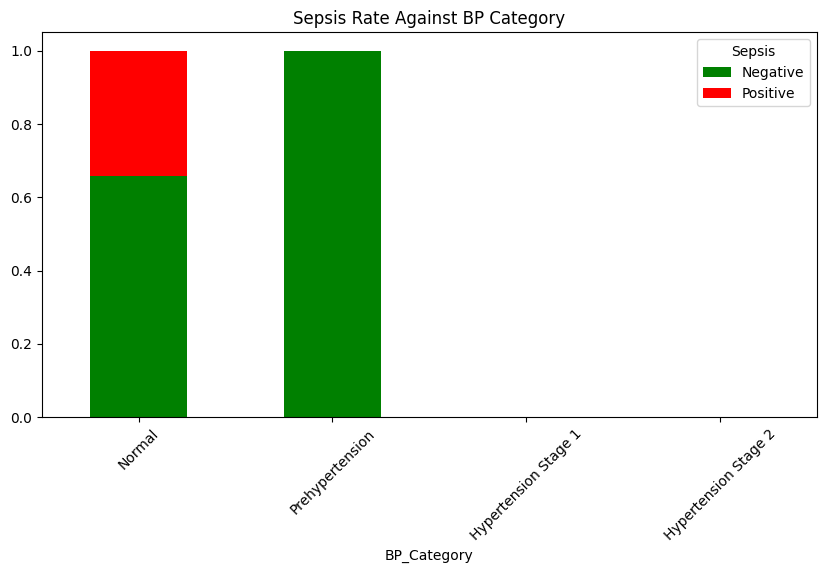

In [22]:
# Categorize BMI
df["BP_Category"] = pd.cut(df["Blood_Pressure"],bins=[0,120,129,139,float("inf")],
                            labels=["Normal","Prehypertension","Hypertension Stage 1","Hypertension Stage 2",])

sepsis_counts = df.groupby("BP_Category")["Sepsis"].value_counts(normalize=True).unstack()

# Plot Sepsis Rate for each BMI category
sepsis_counts.plot(kind="bar", stacked=True, figsize=(10,5), color=custom_palette)
plt.title("Sepsis Rate Against BP Category")
plt.xticks(rotation = 45)
plt.show() 

#### **Analysis of Blood Pressure and Sepsis Risk**

From the visualization above, it is evident that all patients in the sepsis dataset fall between the normal blood pressure levels. This suggests that higher blood pressure is not a major factor in determining the risk of developing sepsis.

Recommendations for Detecting Sepsis:

Comprehensive Health Monitoring: Since blood pressure alone is not a significant indicator of sepsis risk, it is crucial to monitor a combination of vital signs and biomarkers, including heart rate, temperature, respiratory rate, and blood tests.


#### Question 4

Are patients with high plasma glucose levels at a greater risk of developing sepssis?

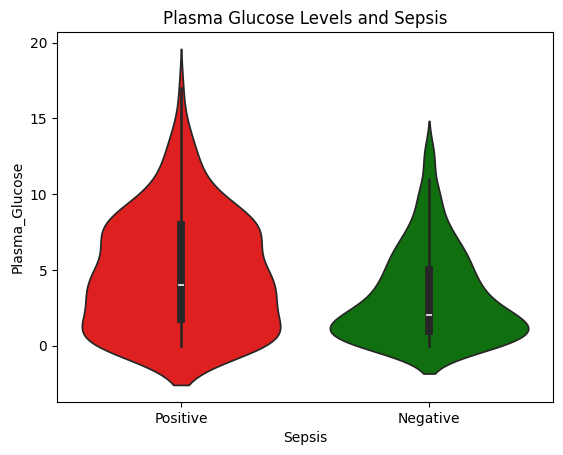

In [23]:

sns.violinplot(df,y="Plasma_Glucose",x="Sepsis",palette=custom_palette)
plt.title("Plasma Glucose Levels and Sepsis")
plt.show()

#### **Analysis of Plasma Glucose Levels and Sepsis Risk**

From the violin plot visualization, it is evident that the median plasma glucose levels of patients with sepsis are higher compared to those without sepsis. Specifically:

The median plasma glucose level for patients with sepsis is approximately 3.5 mmol/L.
For patients without sepsis, the median plasma glucose level is around 1.5 mmol/L.
This significant difference indicates that elevated plasma glucose levels are associated with a higher risk of developing sepsis.
Given the observed correlation, plasma glucose levels should be included as a key feature in the model.

##### Question 5
Are patients with higher insurance coverage at a greater risk of developing sepssis?

In [41]:
# Plot the histogram
fig = px.histogram(df, x=df['Insurance'], color='Sepsis', barmode='group', title='Sepsis Distribution by Insurance Status',color_discrete_map=custom_palette)

# Update X label
fig.update_layout(xaxis_title='Insuarance')

# Show the plot
fig.show()

#### **Analysis of Insurance Coverage and Sepsis Risk**

The graph above displays the distribution of patients categorized by their sepsis status and insurance coverage. In this analysis, '0' signifies patients without health insurance coverage, and '1' represents patients with insurance coverage.

Among the patients without insurance (0), 57 have sepsis, while a larger group, consisting of 131 patients, does not have sepsis. Conversely, among the patients with insurance coverage (1), 151 have sepsis, whereas a higher number of 260 patients are sepsis-free.

This breakdown highlights a notable trend: regardless of insurance status, a larger proportion of patients are tagged as sepsis-negative. This indicates that while insurance coverage is an important factor in healthcare, it does not significantly alter the proportion of sepsis diagnoses in this dataset.



#### Hypothesis Testing
`Null Hypothesis (Ho)`: There is no correlation between age and individual's likelihood of developing sepsis.

`Altenatenate Hypothesis (Ha)`: There is a statistically significant correlation between age and individual's likelihood of developing sepsis.

In [42]:
# Calculate the Spearman's Rank Correlation 
corr, p_value = spearmanr(df["Age"],df["Sepsis"])

# Print the results
print(f"Correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.01:
    print("We reject the null hypothesis, there is a statistically significant correlation between age and individual's likelihood of developing sepsis.")
else:
    print("We fail to reject the null hypothesis, there is no statistically significant correlation between age and individual's likelihood of developing sepsis.")

Correlation: 0.28775208051817225
P-value: 6.956664638525152e-13
We reject the null hypothesis, there is a statistically significant correlation between age and individual's likelihood of developing sepsis.


The hypothesis sought to investigate the relationship between the age of patients in ICU and the risk of sepsis development. After the testing, we had a significantly low p-value of 6.956664638525152e-13 which might suggest that age plays a very crucial role in an ICU patient developing sepsis.

##### Key Insights About Data
- The dataset contains 599 rows and 11 columns
- There are no missing values or duplicates
- The features are not evenly distributed
- There are outliers in the dataset which may affect how we impute missing values.
- There is a general positive correlation between all the features and the target variable
- The null hypothesis has been rejected

#### Data Preparation

##### Check if Dataset is Balanced 

In [31]:
# Check if dataset is balanced
df["Sepsis"].value_counts()

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64

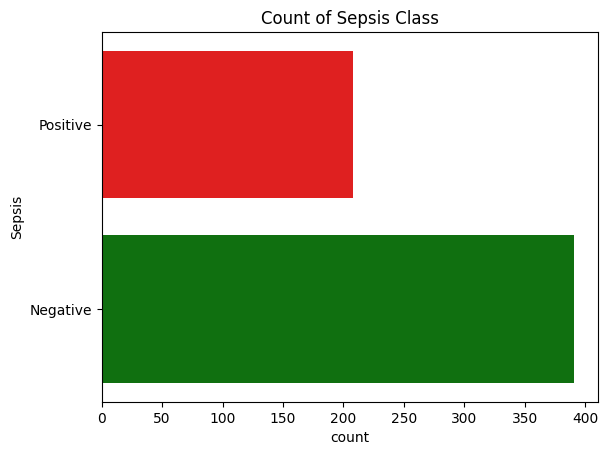

In [30]:
# countplot of target variable
sns.countplot(df["Sepsis"],palette=custom_palette)
plt.title("Count of Sepsis Class")
plt.show()

#### Dealing with Outliers

In [ ]:
def outlier_trimming(df):
    for column in df.select_dtypes(include=[np.number]).columns: #apply trimming to only numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Applying trimming on outliers
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

In [ ]:
# call the outlier_trimming fuction
df = outlier_trimming(df)
df

,Plasma_Glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_Mass_Index,Blood_Work_Result_4,Age,Insurance,Sepsis,BMI_Category,BP_Category
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,0,Positive,Obese,Normal
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0,Negative,Overweight,Normal
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1,Positive,Normal,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,1,Negative,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.2455,33.0,1,Positive,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
594,6.0,123.0,72.0,45.0,230.0,33.6,0.7330,34.0,0,Negative,Obese,Normal
595,0.0,188.0,82.0,14.0,185.0,32.0,0.6820,22.0,1,Positive,Obese,Normal
596,0.0,67.0,76.0,0.0,0.0,45.3,0.1940,46.0,1,Negative,Obese,Normal
597,1.0,89.0,40.0,19.0,25.0,27.8,0.5590,21.0,0,Negative,Overweight,Normal


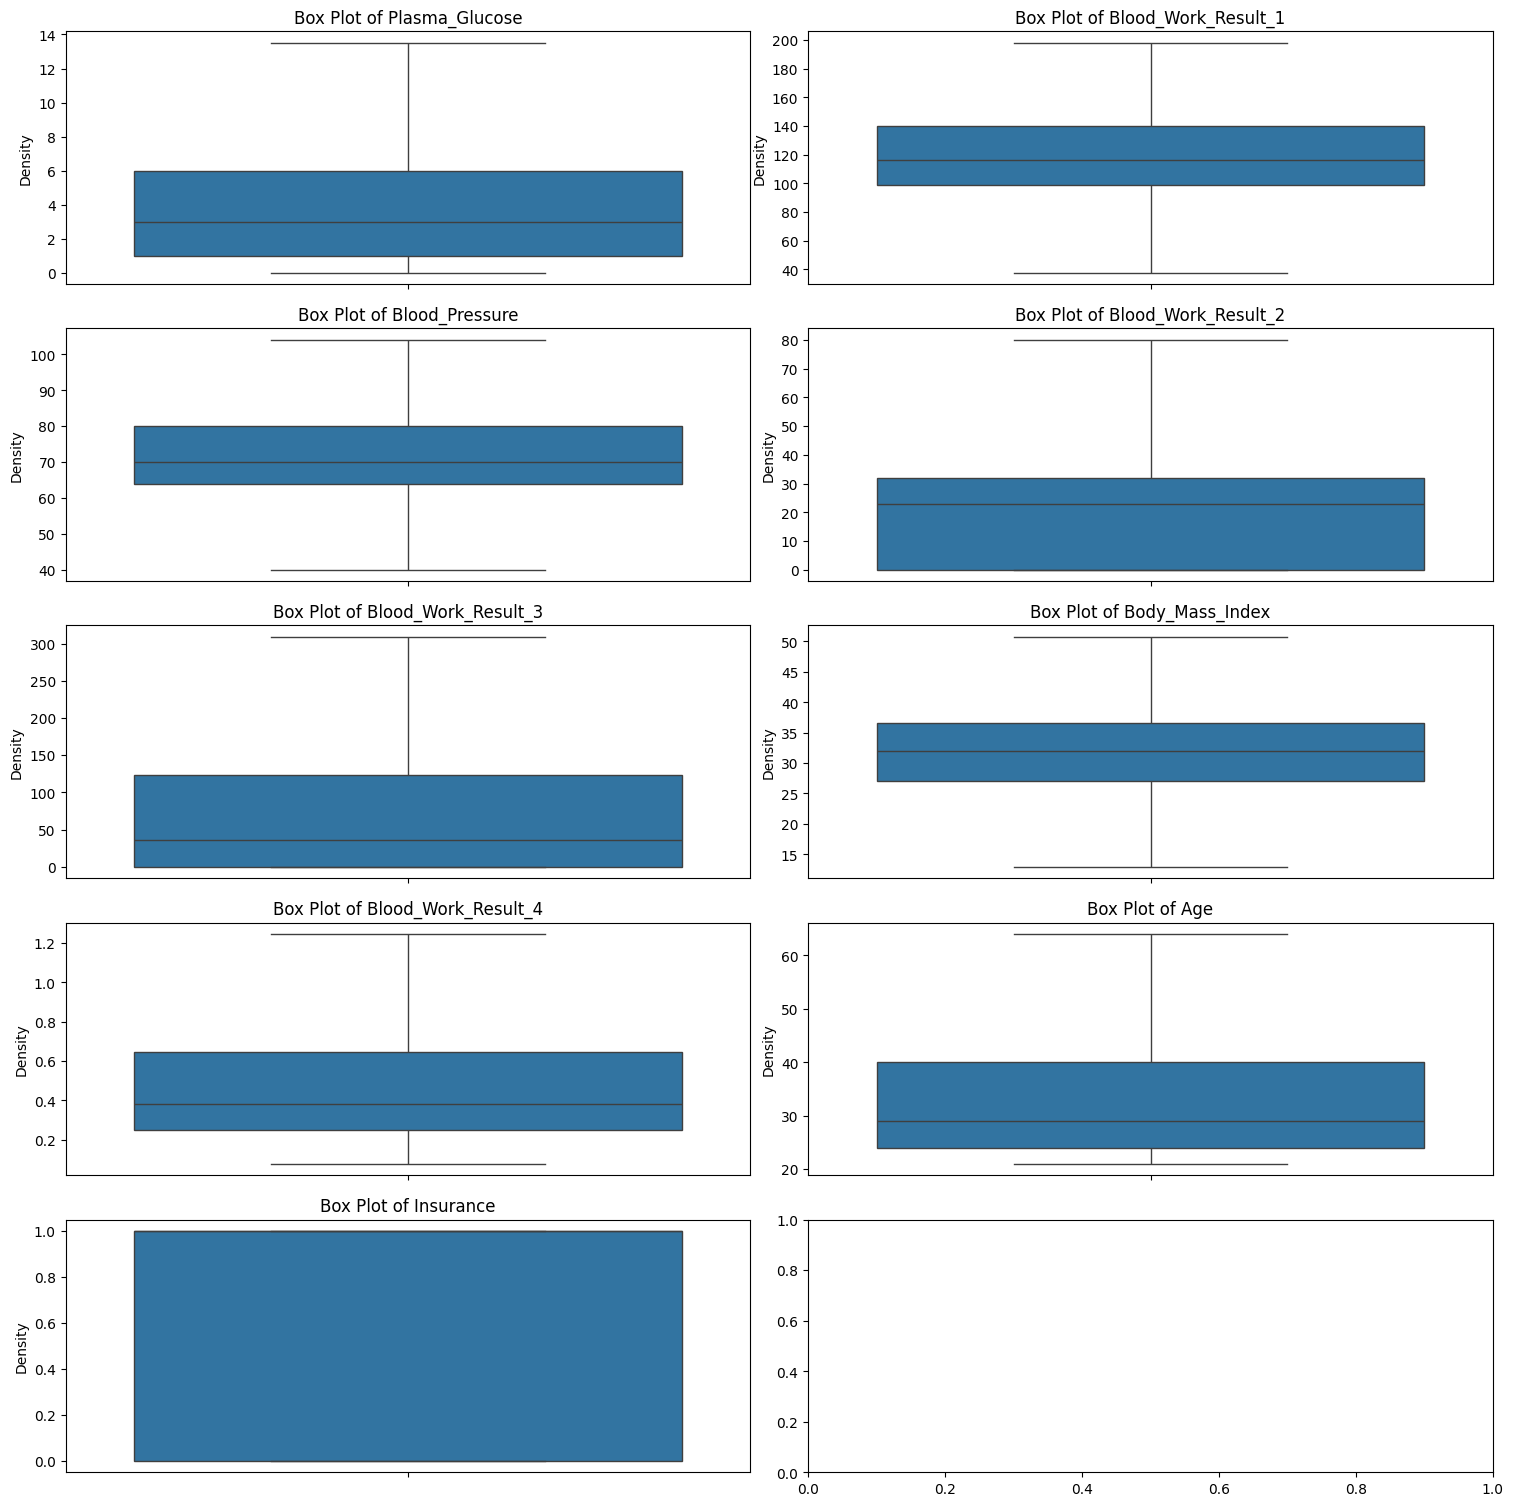

In [ ]:
# check if outliers still exists
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.boxplot(df[column], ax=axes[id])
        axes[id].set_title(f"Box Plot of {column}")
        axes[id].set_ylabel("Density")
plt.show()

The columns with outliers were trim by replacing outliers less than the lower bound with the lower_bound set value and those above the upper bound set to the upper_bound value to suppress the effect of outliers so our model don't learn it.
This decision was made because of the smaller dataset.

#### Split Data Into X and y

In [ ]:
# Split data into X(features) and y(target)
X = df.drop(columns=["Sepsis","BMI_Category","BP_Category"],axis=1)
y = df["Sepsis"]

In [ ]:
X.columns

Index(['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_Mass_Index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object')

#### Train Test Split & Encode Target Variable

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Check the shape of the train test dataset
print(f"Size of trraining dataset: {X_train.shape}")

print(f"Size of test dataset: {X_test.shape}")


Size of trraining dataset: (479, 9)
Size of test dataset: (120, 9)


In [ ]:
# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)


#### Preprocessor Pipeline


In [ ]:
numerical_features = X.select_dtypes(include="number").columns
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index([], dtype='object')

In [ ]:
# Pipeline With The Categorical Features
num_pipeline = Pipeline(
    steps=[
        ("num_imputer",SimpleImputer(strategy="median")),
        ("log_transformer",FunctionTransformer(np.log1p)),
        ("num_scaler", StandardScaler()),
    
       
    ]
) 

cat_pipeline = Pipeline (
    steps=[
        ("feature_engineering",FeatureEngineeringTransformer()),
        ("cat_imputer",SimpleImputer(strategy="most_frequent")),
        ("cat_encoder",OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_pipeline",num_pipeline,numerical_features),
        ("categorical_pipeline",cat_pipeline,categorical_features)
        
],
remainder="passthrough"
)

Although the initial dataset contains no categorical features, but I considered adding a pipeline to cater for categorical features that may be added to the dataset in the near future.

#### Modeling & Evaluation

##### MODEL SELECTION

I considered four (4) models for Sepsis prediction:

1. Logistic Regression
2. Random Forest Classifier
3. XGB Classifier
4. Gradient Boosting Classifier

I will evaluate each model's performance using cross-validation to ensure reliable metrics. The key evaluation metric used is accuracy.

In [ ]:
# Create a list of models to use
models = [
    ("log_regression",LogisticRegression(random_state=42)),
    ("random_forest",RandomForestClassifier(random_state=42)),
    ("xgb_classifier",XGBClassifier()),
    ("gradient_boost",GradientBoostingClassifier(random_state=42))
]

#### Training On Unbalanced Data

In [ ]:

metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","roc_curve", "conf_matrix"])
all_pipelines = {}

# Loop through the models and get the scores
for model_name, classifier in models:
    pipeline = Pipeline(
        steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k="all")),
        ('classifier',classifier)
        ]
    )
    # fit train data on pipeline
    pipeline.fit(X_train,y_train_encoded)

    # predict on test data
    y_pred = pipeline.predict(X_test)

    # store classification report value in a dictionary
    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # save individual pipeline to the all pipelines dictionary
    all_pipelines[model_name] = pipeline

    # Grab values from unbalanced metric table
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]

    # compute ROC curve variables
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)

    # Grab all the metrics and add them to the metrics table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1_score, roc_auc,conf_matrix]

# Sort metrics based on F1-score
metrics_df = metrics_table.sort_values(by="f1_score",ascending=False)
styled_metrics_df = metrics_df.style.background_gradient(cmap='winter')
styled_metrics_df

,model_name,accuracy,precision,recall,f1_score,roc_curve,conf_matrix
3,gradient_boost,0.758333,0.759639,0.758333,0.758932,0.785865,[[62 15] [14 29]]
1,random_forest,0.758333,0.757158,0.758333,0.757691,0.785714,[[63 14] [15 28]]
0,log_regression,0.741667,0.738229,0.741667,0.739466,0.773482,[[63 14] [17 26]]
2,xgb_classifier,0.691667,0.693291,0.691667,0.692431,0.747508,[[58 19] [18 25]]


#### Visualizing The Models Performance

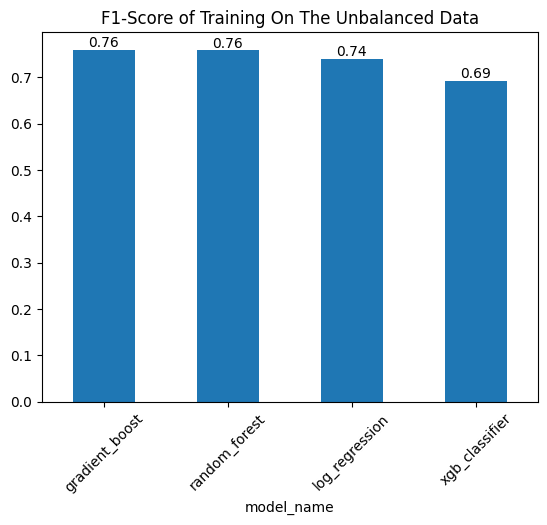

In [ ]:
metrics_df.set_index("model_name",inplace=True)
bar = metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(metrics_df["f1_score"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score of Training On The Unbalanced Data")
plt.xticks(rotation = 45)
plt.show()

#### Handling Class Imbalance
In the context of this project, I encountered class imbalance issues from the "Sepsis" class with Negative = 391 and Positive = 208. This means the model's performance will be skewed towards the Positive class.

In order for me to tackle this challenge, I used SMOTE(Synthetic Minority Over Sampling Techniques) to generate synthetic samples for the minority class. The objective for this step is to remove the class imbalance issue.

#### Training On Balanced Dataset

In [ ]:

balanced_metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","roc_auc","conf_matrix"])
balanced_pipelines = {}

# Loop through the models and get the scores
for model_name, classifier in models:
    pipeline = ImbPipeline(
        steps=[
        ('preprocessor',preprocessor),
        ('smote',SMOTE(sampling_strategy="auto",k_neighbors=5, random_state=42)),
        ('feature_importance',SelectKBest(mutual_info_classif,k="all")),
        ('classifier',classifier)
        ]
    )
    # fit train data on pipeline
    pipeline.fit(X_train,y_train_encoded)

    # predict on test data
    y_pred = pipeline.predict(X_test)

    # store classification report value in a dictionary
    balanced_metrics = classification_report(y_test_encoded,y_pred,output_dict=True)

    # compute the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)

    # save individual pipeline to the all pipelines dictionary
    balanced_pipelines[model_name] = pipeline

    # Grab values from unbalanced metric table
    accuracy = balanced_metrics["accuracy"]
    precision = balanced_metrics["weighted avg"]["precision"]
    recall = balanced_metrics["weighted avg"]["recall"]
    f1_score = balanced_metrics["weighted avg"]["f1-score"]

    # compute ROC curve variables
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)

    # Grab all the metrics and add them to the metrics table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name,accuracy,precision,recall,f1_score,roc_auc,conf_matrix]

# Sort metrics based on F1-score
balanced_metrics_table.sort_values(by="accuracy",ascending=False)

balanced_metrics_df = balanced_metrics_table.sort_values(by="accuracy",ascending=False) 
styled_balanced_metrics_df = balanced_metrics_df.style.background_gradient(cmap='winter')

styled_balanced_metrics_df


,model_name,accuracy,precision,recall,f1_score,roc_auc,conf_matrix
3,gradient_boost,0.750000,0.769009,0.750000,0.754340,0.784053,[[57 20] [10 33]]
1,random_forest,0.725000,0.737500,0.725000,0.728802,0.763365,[[57 20] [13 30]]
2,xgb_classifier,0.708333,0.730710,0.708333,0.713653,0.741166,[[54 23] [12 31]]
0,log_regression,0.683333,0.703656,0.683333,0.688831,0.769254,[[53 24] [14 29]]


#### Visualizing F1-score on the Balanced Data

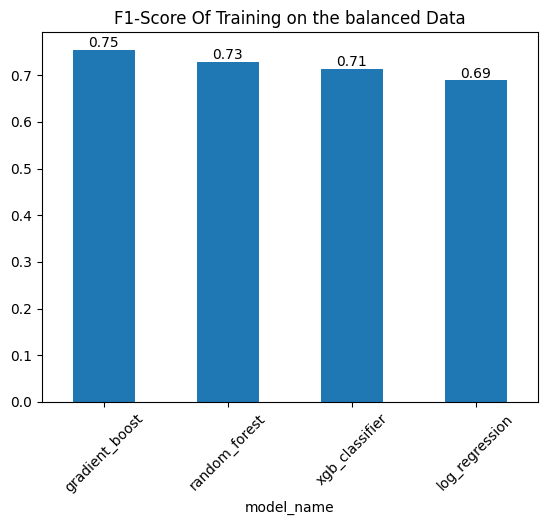

In [ ]:
balanced_metrics_df.set_index("model_name",inplace=True)
bar = balanced_metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(balanced_metrics_df["f1_score"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score Of Training on the balanced Data")
plt.xticks(rotation = 45)
plt.show()

#### Hyperparameter Tuning

#### Using Optuna

Optuna is an open-source Python library for hyperparameter optimization. Developed by the Japanese company Preferred Networks, Optuna provides an elegant and automated way to search for the best hyperparameters by optimizing an objective function. It is designed to be user-friendly and highly adaptable to different machine learning frameworks.

Optuna operates based on a three-step process:

1. **Define the Search Space:** Users specify the range and type of hyperparameters to optimize, such as integer, float, or categorical values. This step defines the search space that Optuna will explore.

2. **Define the Objective Function:** The objective function is the core of the optimization process. It evaluates the performance of the model for a given set of hyperparameters. Optuna aims to minimize or maximize this function, depending on the optimization goal.

3. **Optimization:** Optuna uses Bayesian optimization to sample different hyperparameter configurations. It iteratively evaluates these configurations and updates the probabilistic model, narrowing down the search space. The process continues until a satisfactory set of hyperparameters is found.

In [ ]:
# Store the fine-tuned models in a table
fine_tuned_metrics_table = pd.DataFrame(columns=["model_name","accuracy","precision","recall","f1_score","roc_auc","confusion_matrix"])

# Define parameter grids for Optuna
param_grids = {
    "log_regression": {
        "classifier__penalty": ["l2"],
        "classifier__C": np.logspace(-4, 4, 20),
        "classifier__solver": ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
    },
    "gradient_boost": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2]
    },
    
    "xgb_classifier": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5, 7]
    },
    "random_forest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [3, 5, 7]
    }
}

# Objective function for Optuna
def objective(trial, model_name, pipeline, X_train, y_train, X_test, y_test):

    """
    Objective function for Optuna.
    It evaluates the performance of the model for a given set of hyperparameters.
    """
    param_grid = param_grids[model_name]

    params = {key: trial.suggest_categorical(key, value) if isinstance(value, list) else trial.suggest_float(key, min(value), max(value))
              for key, value in param_grid.items()}

    # unpack params into pipelince
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    return optuna_f1_score(y_test, y_pred, average='weighted')


# Perform Optuna search for each model
for model_name, pipeline in all_pipelines.items():
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name, pipeline, X_train, y_train_encoded, X_test, y_test_encoded), n_trials=20,show_progress_bar=True)
    
    # Update best pipeline
    best_params = study.best_params
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = pipeline
    
    # Make predictions with the best pipeline
    y_pred = pipeline.predict(X_test)

    # Store classification report in a tuned_metrics table
    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Grab values from the tuned metric table
    accuracy = tuned_metrics["accuracy"]
    precision = tuned_metrics["weighted avg"]["precision"]
    recall = tuned_metrics["weighted avg"]["recall"]
    f1_score = tuned_metrics["weighted avg"]["f1-score"]
    
    # Compute ROC curve variables
    ypredict_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test_encoded, ypredict_proba)
    roc_auc = auc(fpr, tpr)
    
    # Add values to the tuned_metrics_table
    fine_tuned_metrics_table.loc[len(fine_tuned_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, roc_auc, conf_matrix]

# Sort values by the f1-score
tuned_metrics_df = fine_tuned_metrics_table.sort_values(by="f1_score", ascending=False)
styled_tuned_metrics_df = tuned_metrics_df.style.background_gradient(cmap='winter')
styled_tuned_metrics_df


[I 2024-07-25 11:49:54,280] A new study created in memory with name: no-name-ce00846e-e58e-42e7-bdda-89c791576e00
Best trial: 0. Best value: 0.739466:  10%|█         | 2/20 [00:00<00:02,  7.78it/s]

[I 2024-07-25 11:49:54,499] Trial 0 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 6381.068938667471, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:54,613] Trial 1 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 9333.528202960159, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  20%|██        | 4/20 [00:00<00:01,  9.80it/s]

[I 2024-07-25 11:49:54,705] Trial 2 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7734.675143658971, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:54,785] Trial 3 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 5023.4507662926335, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  30%|███       | 6/20 [00:00<00:01,  8.71it/s]

[I 2024-07-25 11:49:54,897] Trial 4 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 5246.732577080661, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:55,030] Trial 5 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 3280.206523141051, 'classifier__solver': 'lbfgs'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  40%|████      | 8/20 [00:01<00:01,  7.04it/s]

[I 2024-07-25 11:49:55,201] Trial 6 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 9924.47345103447, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:55,361] Trial 7 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7409.568914372052, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  45%|████▌     | 9/20 [00:01<00:02,  4.99it/s]

[I 2024-07-25 11:49:55,690] Trial 8 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 6511.297184329697, 'classifier__solver': 'saga'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  50%|█████     | 10/20 [00:01<00:02,  4.79it/s]

[I 2024-07-25 11:49:55,929] Trial 9 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 2669.9672630873656, 'classifier__solver': 'lbfgs'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  60%|██████    | 12/20 [00:01<00:01,  5.13it/s]

[I 2024-07-25 11:49:56,166] Trial 10 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 1643.7896064826741, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:56,312] Trial 11 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 9635.352375052868, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  70%|███████   | 14/20 [00:02<00:00,  6.72it/s]

[I 2024-07-25 11:49:56,421] Trial 12 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 8556.20672168361, 'classifier__solver': 'saga'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:56,523] Trial 13 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 6497.512442721302, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  75%|███████▌  | 15/20 [00:02<00:00,  7.33it/s]

[I 2024-07-25 11:49:56,630] Trial 14 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 326.4089116683226, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:56,725] Trial 15 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 8371.170420812809, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  90%|█████████ | 18/20 [00:02<00:00,  8.45it/s]

[I 2024-07-25 11:49:56,827] Trial 16 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 4023.3205273311028, 'classifier__solver': 'newton-cg'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:56,944] Trial 17 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 6132.422326499994, 'classifier__solver': 'liblinear'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466:  95%|█████████▌| 19/20 [00:02<00:00,  8.41it/s]

[I 2024-07-25 11:49:57,065] Trial 18 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 8692.176083587527, 'classifier__solver': 'sag'}. Best is trial 0 with value: 0.7394661448341134.
[I 2024-07-25 11:49:57,234] Trial 19 finished with value: 0.7394661448341134 and parameters: {'classifier__penalty': 'l2', 'classifier__C': 7290.543028705501, 'classifier__solver': 'lbfgs'}. Best is trial 0 with value: 0.7394661448341134.


Best trial: 0. Best value: 0.739466: 100%|██████████| 20/20 [00:02<00:00,  6.90it/s]
[I 2024-07-25 11:49:57,427] A new study created in memory with name: no-name-816b3c41-ee3e-4b72-b48d-f2a2b3616287
Best trial: 0. Best value: 0.748626:   5%|▌         | 1/20 [00:02<00:38,  2.03s/it]

[I 2024-07-25 11:49:59,446] Trial 0 finished with value: 0.7486263736263737 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.7486263736263737.


Best trial: 1. Best value: 0.750882:  10%|█         | 2/20 [00:03<00:31,  1.78s/it]

[I 2024-07-25 11:50:01,045] Trial 1 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  15%|█▌        | 3/20 [00:04<00:21,  1.26s/it]

[I 2024-07-25 11:50:01,704] Trial 2 finished with value: 0.726903043381204 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  20%|██        | 4/20 [00:05<00:17,  1.09s/it]

[I 2024-07-25 11:50:02,526] Trial 3 finished with value: 0.7191851851851853 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  25%|██▌       | 5/20 [00:05<00:13,  1.12it/s]

[I 2024-07-25 11:50:03,081] Trial 4 finished with value: 0.7394661448341134 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  30%|███       | 6/20 [00:06<00:11,  1.20it/s]

[I 2024-07-25 11:50:03,786] Trial 5 finished with value: 0.7191851851851853 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  35%|███▌      | 7/20 [00:06<00:09,  1.38it/s]

[I 2024-07-25 11:50:04,298] Trial 6 finished with value: 0.738765874308043 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  40%|████      | 8/20 [00:07<00:06,  1.75it/s]

[I 2024-07-25 11:50:04,539] Trial 7 finished with value: 0.7411745827984596 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  45%|████▌     | 9/20 [00:07<00:05,  1.91it/s]

[I 2024-07-25 11:50:04,958] Trial 8 finished with value: 0.7014354066985646 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 7}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  50%|█████     | 10/20 [00:08<00:05,  1.94it/s]

[I 2024-07-25 11:50:05,449] Trial 9 finished with value: 0.7394661448341134 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  55%|█████▌    | 11/20 [00:09<00:07,  1.27it/s]

[I 2024-07-25 11:50:06,845] Trial 10 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  60%|██████    | 12/20 [00:11<00:08,  1.05s/it]

[I 2024-07-25 11:50:08,468] Trial 11 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  65%|██████▌   | 13/20 [00:12<00:07,  1.09s/it]

[I 2024-07-25 11:50:09,695] Trial 12 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  70%|███████   | 14/20 [00:13<00:06,  1.10s/it]

[I 2024-07-25 11:50:10,825] Trial 13 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  75%|███████▌  | 15/20 [00:15<00:06,  1.29s/it]

[I 2024-07-25 11:50:12,553] Trial 14 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  80%|████████  | 16/20 [00:15<00:04,  1.11s/it]

[I 2024-07-25 11:50:13,250] Trial 15 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  85%|████████▌ | 17/20 [00:16<00:02,  1.19it/s]

[I 2024-07-25 11:50:13,463] Trial 16 finished with value: 0.7411745827984596 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  90%|█████████ | 18/20 [00:16<00:01,  1.25it/s]

[I 2024-07-25 11:50:14,168] Trial 17 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 1. Best value: 0.750882:  95%|█████████▌| 19/20 [00:17<00:00,  1.21it/s]

[I 2024-07-25 11:50:15,061] Trial 18 finished with value: 0.7508817358510611 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3}. Best is trial 1 with value: 0.7508817358510611.


Best trial: 19. Best value: 0.756275: 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


[I 2024-07-25 11:50:15,403] Trial 19 finished with value: 0.7562747806512675 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 5}. Best is trial 19 with value: 0.7562747806512675.


[I 2024-07-25 11:50:15,762] A new study created in memory with name: no-name-7eb7e9fb-9f8f-4f29-83e7-88d2dd653074
Best trial: 0. Best value: 0.783333:   5%|▌         | 1/20 [00:00<00:03,  5.32it/s]

[I 2024-07-25 11:50:15,945] Trial 0 finished with value: 0.7833333333333333 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  10%|█         | 2/20 [00:00<00:04,  3.97it/s]

[I 2024-07-25 11:50:16,241] Trial 1 finished with value: 0.7486263736263737 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  15%|█▌        | 3/20 [00:01<00:09,  1.82it/s]

[I 2024-07-25 11:50:17,143] Trial 2 finished with value: 0.7026666666666668 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  20%|██        | 4/20 [00:01<00:07,  2.02it/s]

[I 2024-07-25 11:50:17,554] Trial 3 finished with value: 0.7486263736263737 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  25%|██▌       | 5/20 [00:02<00:07,  2.13it/s]

[I 2024-07-25 11:50:17,977] Trial 4 finished with value: 0.7123655913978495 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  30%|███       | 6/20 [00:02<00:06,  2.20it/s]

[I 2024-07-25 11:50:18,406] Trial 5 finished with value: 0.6949639845612999 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  35%|███▌      | 7/20 [00:03<00:05,  2.31it/s]

[I 2024-07-25 11:50:18,794] Trial 6 finished with value: 0.7026666666666668 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  40%|████      | 8/20 [00:03<00:05,  2.05it/s]

[I 2024-07-25 11:50:19,395] Trial 7 finished with value: 0.7026666666666668 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  45%|████▌     | 9/20 [00:03<00:04,  2.36it/s]

[I 2024-07-25 11:50:19,686] Trial 8 finished with value: 0.7337011659097549 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  50%|█████     | 10/20 [00:04<00:04,  2.23it/s]

[I 2024-07-25 11:50:20,188] Trial 9 finished with value: 0.7123655913978495 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  55%|█████▌    | 11/20 [00:04<00:03,  2.59it/s]

[I 2024-07-25 11:50:20,429] Trial 10 finished with value: 0.7600057047895429 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  60%|██████    | 12/20 [00:05<00:04,  1.60it/s]

[I 2024-07-25 11:50:21,601] Trial 11 finished with value: 0.7600057047895429 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  70%|███████   | 14/20 [00:07<00:04,  1.30it/s]

[I 2024-07-25 11:50:23,549] Trial 12 finished with value: 0.7600057047895429 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.
[I 2024-07-25 11:50:23,724] Trial 13 finished with value: 0.7600057047895429 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  75%|███████▌  | 15/20 [00:08<00:02,  1.67it/s]

[I 2024-07-25 11:50:23,927] Trial 14 finished with value: 0.7180223285486443 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.
[I 2024-07-25 11:50:24,105] Trial 15 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  85%|████████▌ | 17/20 [00:08<00:01,  2.49it/s]

[I 2024-07-25 11:50:24,347] Trial 16 finished with value: 0.720162553858206 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  90%|█████████ | 18/20 [00:08<00:00,  2.79it/s]

[I 2024-07-25 11:50:24,603] Trial 17 finished with value: 0.7833333333333333 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333:  95%|█████████▌| 19/20 [00:09<00:00,  2.50it/s]

[I 2024-07-25 11:50:25,095] Trial 18 finished with value: 0.7833333333333333 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3}. Best is trial 0 with value: 0.7833333333333333.


Best trial: 0. Best value: 0.783333: 100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


[I 2024-07-25 11:50:25,408] Trial 19 finished with value: 0.720162553858206 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}. Best is trial 0 with value: 0.7833333333333333.


[I 2024-07-25 11:50:25,685] A new study created in memory with name: no-name-e2fe01b5-3dc5-449a-8f51-a29dd3ba75d5
Best trial: 0. Best value: 0.758932:   5%|▌         | 1/20 [00:00<00:13,  1.39it/s]

[I 2024-07-25 11:50:26,397] Trial 0 finished with value: 0.7589324618736383 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}. Best is trial 0 with value: 0.7589324618736383.


Best trial: 0. Best value: 0.758932:  10%|█         | 2/20 [00:01<00:16,  1.08it/s]

[I 2024-07-25 11:50:27,471] Trial 1 finished with value: 0.7279408510952136 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 0 with value: 0.7589324618736383.


Best trial: 0. Best value: 0.758932:  15%|█▌        | 3/20 [00:02<00:17,  1.00s/it]

[I 2024-07-25 11:50:28,569] Trial 2 finished with value: 0.7589324618736383 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}. Best is trial 0 with value: 0.7589324618736383.


Best trial: 3. Best value: 0.766667:  20%|██        | 4/20 [00:03<00:13,  1.16it/s]

[I 2024-07-25 11:50:29,216] Trial 3 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  25%|██▌       | 5/20 [00:03<00:09,  1.55it/s]

[I 2024-07-25 11:50:29,471] Trial 4 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  30%|███       | 6/20 [00:04<00:11,  1.20it/s]

[I 2024-07-25 11:50:30,673] Trial 5 finished with value: 0.7423071144166479 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  35%|███▌      | 7/20 [00:05<00:09,  1.30it/s]

[I 2024-07-25 11:50:31,306] Trial 6 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  40%|████      | 8/20 [00:06<00:10,  1.11it/s]

[I 2024-07-25 11:50:32,489] Trial 7 finished with value: 0.7423071144166479 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  45%|████▌     | 9/20 [00:07<00:10,  1.08it/s]

[I 2024-07-25 11:50:33,456] Trial 8 finished with value: 0.7373378770885457 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  50%|█████     | 10/20 [00:08<00:08,  1.25it/s]

[I 2024-07-25 11:50:33,983] Trial 9 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  55%|█████▌    | 11/20 [00:08<00:06,  1.47it/s]

[I 2024-07-25 11:50:34,385] Trial 10 finished with value: 0.72265625 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.01}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  60%|██████    | 12/20 [00:09<00:04,  1.60it/s]

[I 2024-07-25 11:50:34,882] Trial 11 finished with value: 0.7511961722488039 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  65%|██████▌   | 13/20 [00:09<00:03,  1.81it/s]

[I 2024-07-25 11:50:35,275] Trial 12 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  70%|███████   | 14/20 [00:10<00:03,  1.96it/s]

[I 2024-07-25 11:50:35,685] Trial 13 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  75%|███████▌  | 15/20 [00:10<00:02,  2.12it/s]

[I 2024-07-25 11:50:36,071] Trial 14 finished with value: 0.7511961722488039 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.2}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  80%|████████  | 16/20 [00:10<00:01,  2.28it/s]

[I 2024-07-25 11:50:36,420] Trial 15 finished with value: 0.72265625 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.01}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  85%|████████▌ | 17/20 [00:11<00:01,  2.46it/s]

[I 2024-07-25 11:50:36,763] Trial 16 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  90%|█████████ | 18/20 [00:11<00:00,  2.12it/s]

[I 2024-07-25 11:50:37,385] Trial 17 finished with value: 0.7666666666666667 and parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.1}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667:  95%|█████████▌| 19/20 [00:12<00:00,  2.08it/s]

[I 2024-07-25 11:50:37,878] Trial 18 finished with value: 0.7373378770885457 and parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}. Best is trial 3 with value: 0.7666666666666667.


Best trial: 3. Best value: 0.766667: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]


[I 2024-07-25 11:50:40,043] Trial 19 finished with value: 0.7279408510952136 and parameters: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}. Best is trial 3 with value: 0.7666666666666667.


,model_name,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
2,xgb_classifier,0.783333,0.783333,0.783333,0.783333,0.799154,[[64 13] [13 30]]
3,gradient_boost,0.766667,0.766667,0.766667,0.766667,0.799758,[[63 14] [14 29]]
1,random_forest,0.758333,0.755208,0.758333,0.756275,0.796436,[[64 13] [16 27]]
0,log_regression,0.741667,0.738229,0.741667,0.739466,0.773482,[[63 14] [17 26]]


#### Visualize Model's -scores on Bar Graph

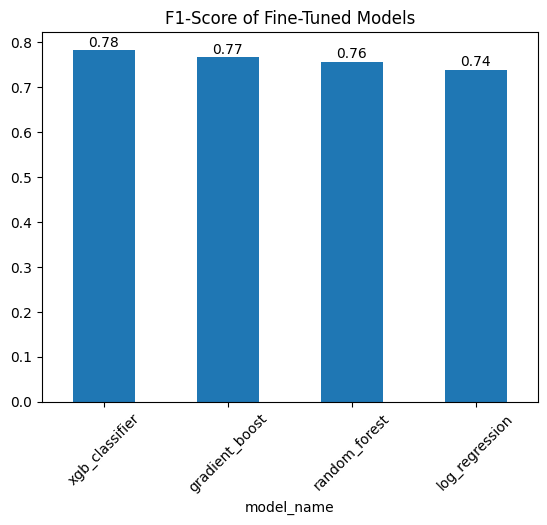

In [ ]:
tuned_metrics_df.set_index("model_name",inplace=True)
bar = tuned_metrics_df["f1_score"].plot(kind="bar")
# add data labels
for i,v in enumerate(tuned_metrics_df["accuracy"]):
    bar.text(i,v, str(round(v,2)), ha="center", va="bottom")
plt.title("F1-Score of Fine-Tuned Models")
plt.xticks(rotation = 45)
plt.show()

### HYPERPARAMETER PROCESS VISUALIZATION

We can also visualize the optimization process using Optuna's built-in visualization functions. These functions use Plotly to create interactive plots that show various aspects of the optimization process

In [ ]:
# Plot Hyperparameter visualization
ov.plot_optimization_history(study)

The optimization history plot shows how the F1-score value changes over the number of trials. It also shows the best value so far and the percentile range of the values. It can be seen that the F1-score increases and decreases in the first few trials, then stabilizes around 0.78, and reaches the highest value of 0.7666 at trial 5.

#### Plotting The Confusion Matrix

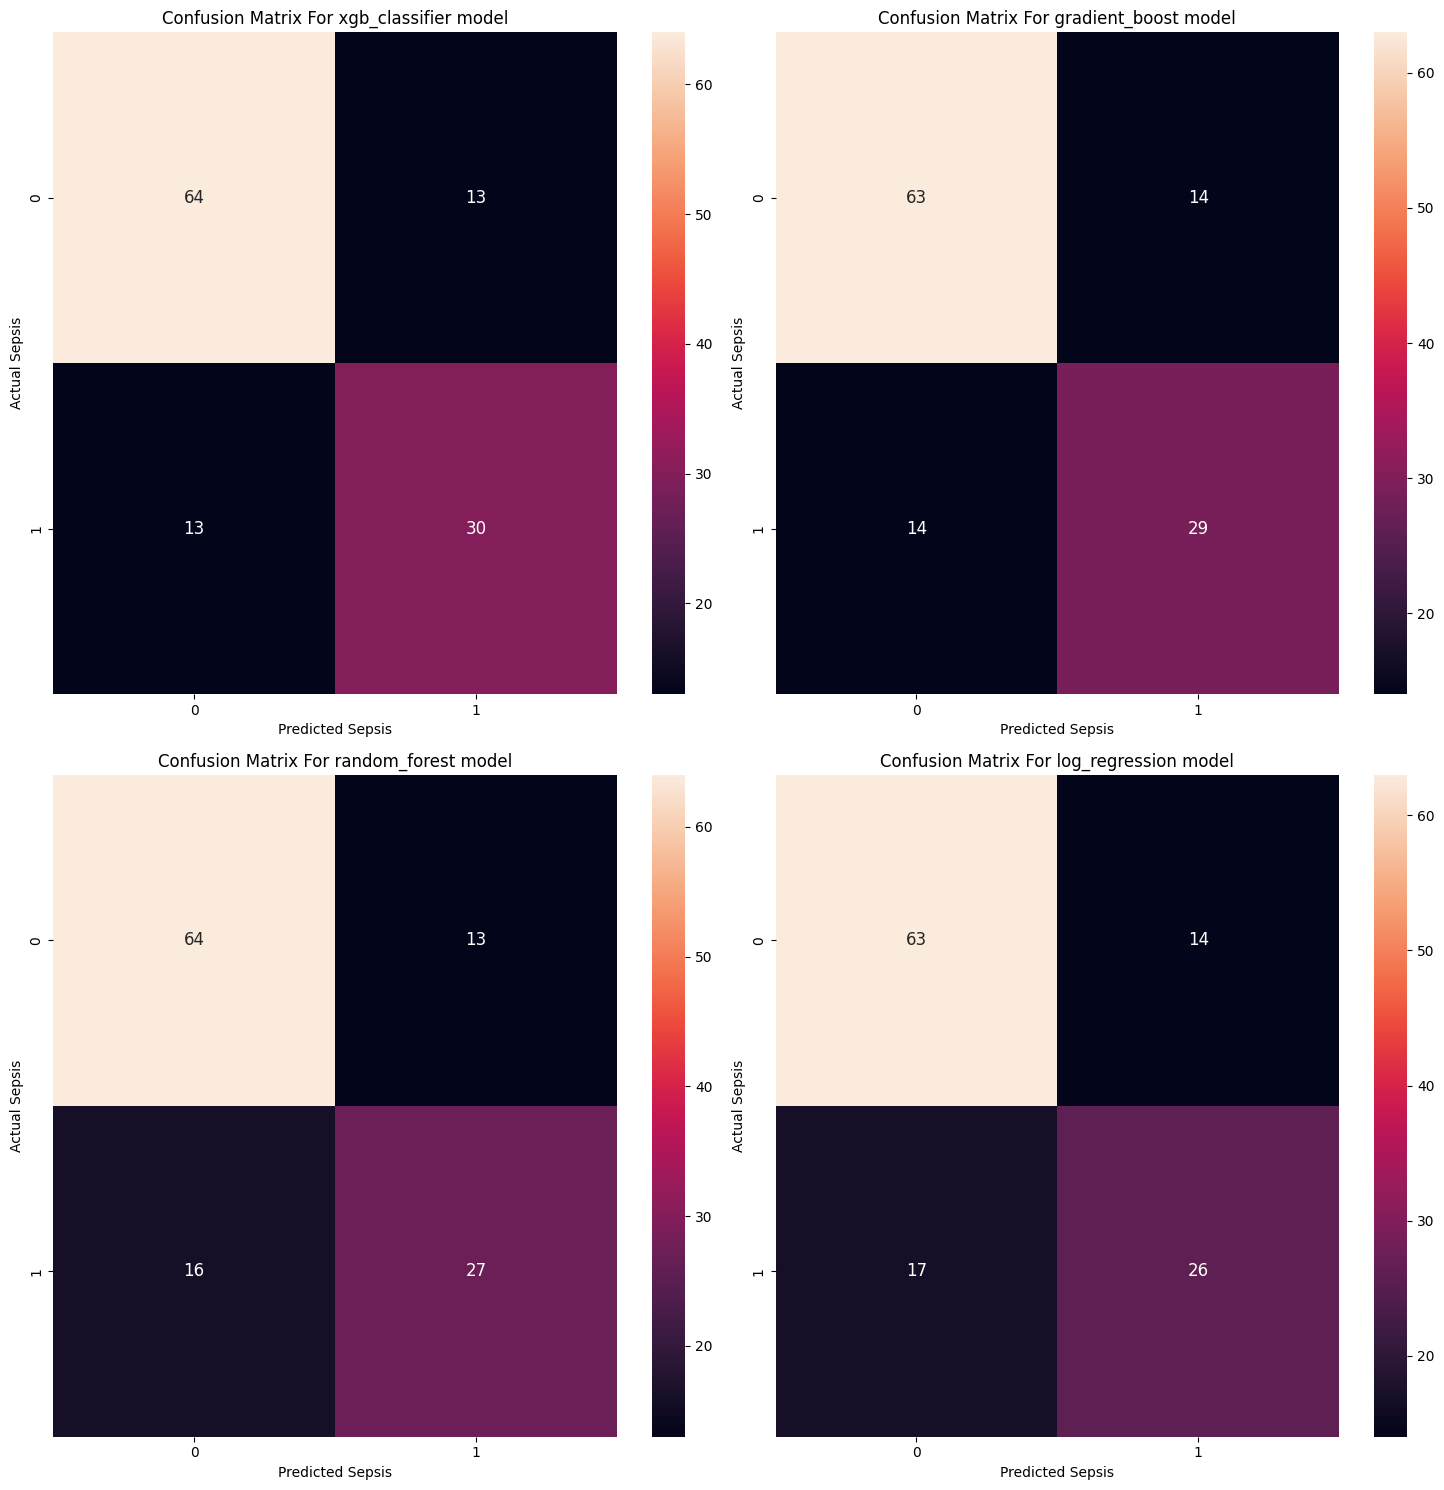

In [ ]:
# Convert the confusion matrices from lists to numpy arrays for easier visualization
tuned_metrics_df['confusion_matrix'] = tuned_metrics_df['confusion_matrix'].apply(lambda x: np.array(x))

# Create subplots
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (15,15))
fig.tight_layout()

# Flatten the axes array for easy iteration
axes = axes.flatten() 

for i,(model_name,row) in enumerate(tuned_metrics_df.iterrows()):
    conf_matrix = row["confusion_matrix"]
    sns.heatmap(conf_matrix,annot=True,fmt="d", annot_kws={"size":12},ax=axes[i])
    axes[i].set_title(f"Confusion Matrix For {model_name} model")
    axes[i].set_xlabel("Predicted Sepsis")
    axes[i].set_ylabel("Actual Sepsis")

# Display the plot
plt.tight_layout()
plt.show()

#### **Interpretation of Confusion Matrix**
Positive class(Sepsis) = 1
Negative Class(Not Sepsis) = 0

- TP: Represents a section of the patients that the ML algorithm predicted them to have the Sepsis disease and they actually have the disease.
- FP: Represents a section of the patients where the ML model predicted them to have the Sepsis disease but they actually don't have.
- FN: Represents the section of patients where the ML model predicted them not having the Sepsis disease but they actually have.
- TN: Section of the patients where the ML model predicted them Not having the Sepsis disease and the actually don't have.


#### Visualize Evaluation Using ROC-AUC

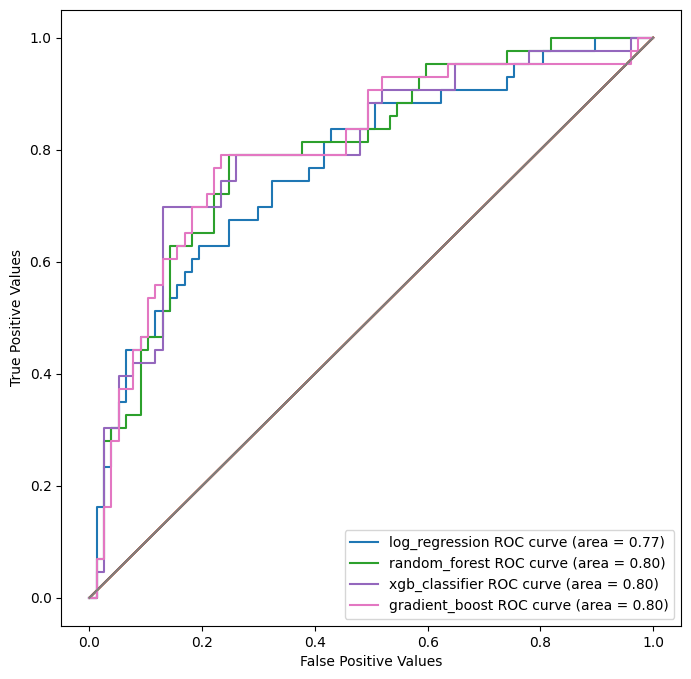

In [ ]:
roc_data = {}

# set subplots
fig,axes = plt.subplots(figsize=(8,8))

# Loop through all models and pipelines
for model_name, pipeline in all_pipelines.items():
    # get the predicted probability of each model and store in predict_proba variable
    ypredict_proba = pipeline.predict_proba(X_test)[:,1]
    # Unpack all roc curve variables
    fpr,tpr,threshold = roc_curve(y_test_encoded,ypredict_proba)
    # compute AUC
    roc_auc = auc(fpr,tpr)
    # add auc to the roc_data dictionary
    roc_auc_df = pd.DataFrame({"False Positive Rate":fpr,"True Positive Rate":tpr,"Threshold":threshold})
    roc_data[model_name] = roc_auc_df
    # plot the roc curve
    axes.plot(fpr,tpr, label=f"{model_name} ROC curve (area = {roc_auc:.2f})")
    # axes.plot(fpr, tpr, label=f"{model_name} ROC curve (area = {roc_auc:.2f})")
    axes.plot([0,1],[0,1])
    axes.set_xlabel("False Positive Values")
    axes.set_ylabel("True Positive Values")

# Show visualization with legend
plt.legend()
plt.show()

#### Project Impact Analysis
- The main objective of this project is to be able to improve upon Recall/Sensitivity(the proportion of patients the model correctly predicted to having the Sepsis disease). 
- The project focus is on the Positive Class, how our model is performing on predicting patients who have Sepsis disease. 
- It is expected to have an ROC curve area of 85 or above but the model's ROC curve value isn't giving the set ROC value.
- The AUC curve shown above needs to be tweaked to help determine majority of patients with Sepsis disease so that the doctors can give them the necessary attention. 

#### Check ROC thresholds for logistic regression and random forest

In [ ]:
roc_data["gradient_boost"].tail(20)

,False Positive Rate,True Positive Rate,Threshold
26,0.207792,0.720930,0.460832
27,0.220779,0.720930,0.444524
28,0.220779,0.767442,0.424980
29,0.233766,0.767442,0.414916
30,0.233766,0.790698,0.404939
31,0.454545,0.790698,0.224743
32,0.454545,0.837209,0.157778
33,0.493506,0.837209,0.147696
34,0.493506,0.906977,0.143666
35,0.519481,0.906977,0.135597


In [ ]:
roc_data["xgb_classifier"].tail(30)

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.012987,0.000000,0.978731
2,0.012987,0.046512,0.950278
3,0.025974,0.046512,0.934812
4,0.025974,0.302326,0.835373
5,0.051948,0.302326,0.805024
6,0.051948,0.395349,0.770964
7,0.077922,0.395349,0.762409
8,0.077922,0.418605,0.759043
9,0.116883,0.418605,0.723920


- For XGB Classifier model the optimum threshold is 0.127845. The TPR = 0.883721 and FPR = 0.493506			
- For Gradient Boost model the optimum threshold is 0.143666. The TPR = 0.906977 and FPR = 0.493506		

In [ ]:
# save the top two performing models
gradient_boost_pipeline = balanced_pipelines["gradient_boost"]
xgb_classifier_pipeline = balanced_pipelines["xgb_classifier"]


In [ ]:
# check for the gradient_boost_pipeline
gradient_boost_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Resul...
                                                                  ('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000001E868EAA5C0>)),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=50, random_state=42))])

#### Tweak ROC Perfomance

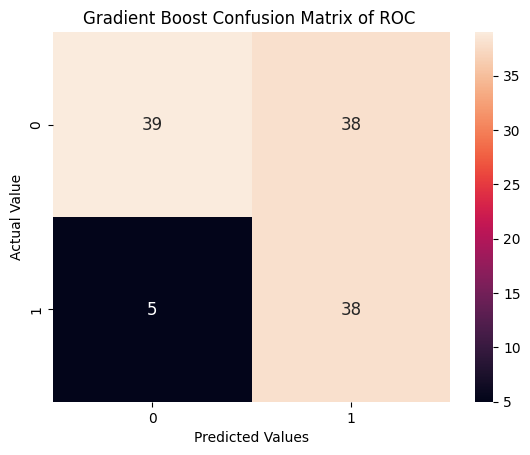

In [ ]:
gradient_boost_threshold = 0.143666
gradient_boost_proba = gradient_boost_pipeline.predict_proba(X_test)[:,1]
# adjust threshold to maximize TPR
y_pred_log_reg = (gradient_boost_proba > gradient_boost_threshold).astype(int)
roc_conf_matrix = confusion_matrix(y_test_encoded, y_pred_log_reg)
# Plot the confusion Matrix
sns.heatmap(roc_conf_matrix,annot=True,fmt="d",annot_kws={"size":12})
plt.title("Gradient Boost Confusion Matrix of ROC ")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Value")
plt.show()

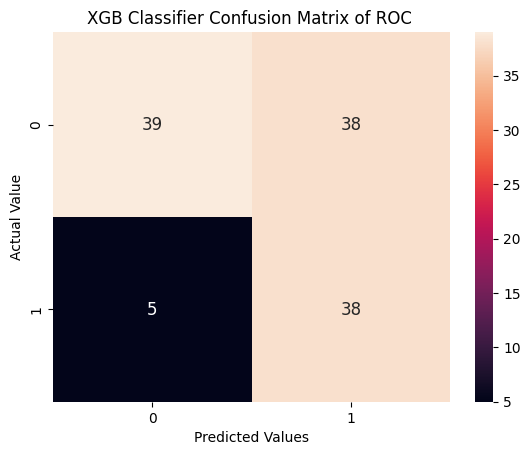

In [ ]:
xgb_classifier_threshold = 0.127845

xgb_classifier_proba = xgb_classifier_pipeline.predict_proba(X_test)[:,1]
# adjust threshold to maximize TPR
y_pred_random_forest = (xgb_classifier_proba > xgb_classifier_threshold).astype(int)
xgb_classifier_matrix = confusion_matrix(y_test_encoded,y_pred_random_forest)
# Plot the confusion Matrix
sns.heatmap(xgb_classifier_matrix, annot=True,fmt="d",annot_kws={"size":12})
plt.title("XGB Classifier Confusion Matrix of ROC ")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Value")
plt.show()

#### Feature Importance

<Axes: title={'center': 'Feature Importance'}>

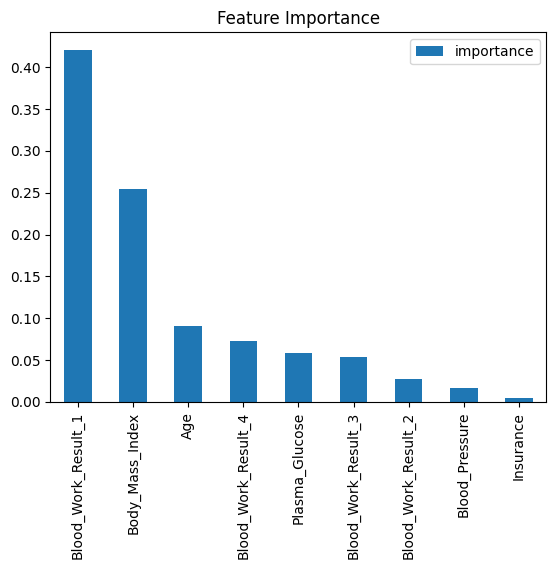

In [ ]:
feature_importance = gradient_boost_pipeline.named_steps.classifier.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame(feature_importance, index=feature_names ,columns=["importance"]).head(10)
feat_df.sort_values("importance",ascending=False).plot(kind="bar",title="Feature Importance")

<Axes: title={'center': 'Feature Importance For XGB Classifier Model'}>

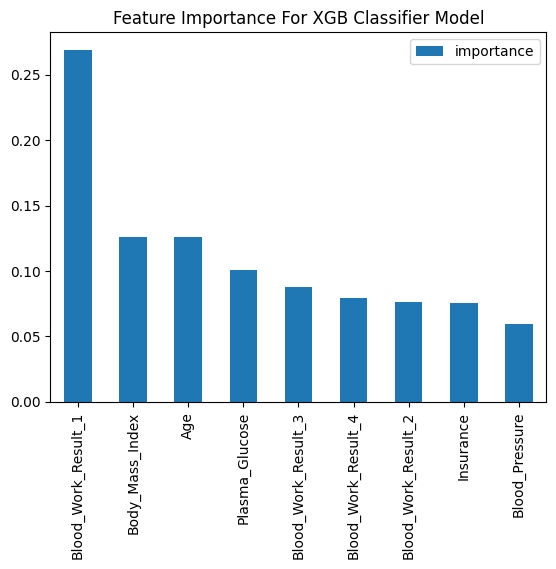

In [ ]:
feature_importance = xgb_classifier_pipeline.named_steps.classifier.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame(feature_importance, index=feature_names ,columns=["importance"]).head(10)
feat_df.sort_values("importance",ascending=False).plot(kind="bar",title="Feature Importance For XGB Classifier Model")

#### Prediction On Test Data

In [ ]:
# Load Test Data
test_df = pd.read_csv("../data/Paitients_Files_Test.csv")
# preview data
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [ ]:
# Check info about data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


#### Preprocess Test Data

In [ ]:
# Rename columns in Dataset
new_col_names = {
    "PRG":"Plasma_Glucose",
    "PL":"Blood_Work_Result_1",
    "PR":"Blood_Pressure",
    "SK":"Blood_Work_Result_2",
    "TS":"Blood_Work_Result_3",
    "M11":"Body_Mass_Index",
    "BD2":"Blood_Work_Result_4",
}

test_df.rename(columns = new_col_names,inplace=True)

test_df.head()

,ID,Plasma_Glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_Mass_Index,Blood_Work_Result_4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [ ]:
# Drop the ID column
X_test = test_df.copy()
X_test.drop(columns="ID",inplace=True)

In [ ]:
# Check for Nulls
X_test.isna().sum()

Plasma_Glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
Body_Mass_Index        0
Blood_Work_Result_4    0
Age                    0
Insurance              0
dtype: int64

In [ ]:
# Predict the labels on the preprocessed test data using the trained model
y_predict_with_best_model = xgb_classifier_pipeline.predict(X_test)

# Create a DataFrame to store the predicted results
predicted_result = pd.DataFrame({'ID':test_df["ID"], 'Sepsis': np.where(y_predict_with_best_model == 1, 'Positive', 'Negative')})

# Display the count of predicted patients who are likely to develop sepsis or not
sepsis_counts = predicted_result['Sepsis'].value_counts()
print(sepsis_counts)

Sepsis
Negative    112
Positive     57
Name: count, dtype: int64


In [ ]:
predicted_result

,ID,Sepsis
0,ICU200609,Negative
1,ICU200610,Negative
2,ICU200611,Negative
3,ICU200612,Negative
4,ICU200613,Negative
...,...,...
164,ICU200773,Negative
165,ICU200774,Negative
166,ICU200775,Negative
167,ICU200776,Positive


#### Persist Model

In [ ]:
model_components = {
    "encoder":encoder,
    "xgb_classifier":xgb_classifier_pipeline,
    "gradient_boost":gradient_boost_pipeline
    }

In [ ]:
# Define the path for saving model
model_dir = "../api/models"
# Create models dir if it does not exists
os.makedirs(model_dir,exist_ok=True)

In [ ]:
# Define the full path for the joblib file
components_path = os.path.join(model_dir,"model_components.joblib")

In [ ]:
with open(components_path,'wb') as file:
    joblib.dump(model_components, file)